# Procesar Finanzas (prueba)

### historial

In [ ]:
import pandas as pd

# Ruta del archivo Excel
ruta_archivo = 'C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\efipem_municipal_anual_tr_cifra_2017.csv'

# Cargar el archivo Excel en un DataFrame
df = pd.read_csv(ruta_archivo)

# Realizar operaciones con el DataFrame cargado
# ...

In [ ]:
pip install xlrd

In [ ]:
# ### CREACIÓN DE ÍNDICE DE MUNICIPIOS - ENTIDADES
#Ruta del archivo Excel
ruta_archivo_1 = 'C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\tc_entidad.csv'
ruta_archivo_2 = 'C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\tc_municipio.csv'

# Cargar el archivo Excel en un DataFrame
df_1 = pd.read_csv(ruta_archivo_1)
df_2 = pd.read_csv(ruta_archivo_2)

In [ ]:
df_1=df_1.set_index('ID_ENTIDAD',drop=True)

In [ ]:
df_2

In [ ]:
df_x= pd.merge(df_2,df_1, left_on=df_2['ID_ENTIDAD'], right_index=True)
df_x=df_x.drop(columns='key_0')
df_x

In [ ]:
with pd.ExcelWriter('C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\index 2.xlsx') as writer:
    df_x.to_excel(writer, sheet_name='index', index=False)

In [ ]:
import pandas as pd

# ### CREACIÓN DE DOCUMENTO BASE
#Ruta del archivo Excel
ruta_archivo_3 = 'C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\index 2.xlsx'

In [ ]:
ruta_archivo_4 = 'C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\Datos Base.xlsx'

In [ ]:
# Cargar el archivo Excel en un DataFrame
df_3 = pd.read_excel(ruta_archivo_3)

In [ ]:
df_4 = pd.read_excel(ruta_archivo_4)

In [ ]:
df_3=df_3.set_index('CVE_GEO',drop=True)

In [ ]:
df_3

In [ ]:
df_y= pd.merge(df_4,df_3, left_on=df_4['CVE_GEO'], right_index=True)
df_y=df_y.drop(columns=['key_0','ID_ENTIDAD_y','ID_MUNICIPIO_y'])
df_y

In [ ]:
with pd.ExcelWriter('C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\DATA.xlsx') as writer:
    df_y.to_excel(writer, sheet_name='index', index=False)

In [ ]:
## conversión de csv a xlsx

# Ruta del archivo csv
ruta_archivo = 'C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\DATA.csv'

# Cargar el archivo Excel en un DataFrame
df = pd.read_csv(ruta_archivo)

In [ ]:
df['DESCRIPCION_CATEGORIA'].unique()

In [ ]:
### Análisis de datos 2017

# Filtrar las columnas necesarias
df = df[['CVE_GEO', 'DESCRIPCION_CATEGORIA', 'VALOR', 'NOM_ENT', 'NOM_MUN', 'TEMA']]

# Filtrar por variables de egresos
df_egresos = df[df['TEMA'] == 'Egresos']

# Filtrar por variables de ingresos
df_ingresos = df[df['TEMA'] == 'Ingresos']

# Pivotar la tabla para obtener variables como columnas en cada hoja
df_egresos_pivot = df_egresos.pivot_table(index=['CVE_GEO', 'NOM_ENT', 'NOM_MUN'], columns='DESCRIPCION_CATEGORIA', values='VALOR').reset_index()
df_ingresos_pivot = df_ingresos.pivot_table(index=['CVE_GEO', 'NOM_ENT', 'NOM_MUN'], columns='DESCRIPCION_CATEGORIA', values='VALOR').reset_index()

# Renombrar las columnas resultantes en cada hoja
df_egresos_pivot.columns.name = None
df_ingresos_pivot.columns.name = None

# Crear un archivo Excel con dos hojas, una para egresos y otra para ingresos
with pd.ExcelWriter('C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\Filtrado 1.xlsx') as writer:
    df_egresos_pivot.to_excel(writer, sheet_name='Egresos', index=False)
    df_ingresos_pivot.to_excel(writer, sheet_name='Ingresos', index=False)

### Crear índice nuevo

In [ ]:

import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel('C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\DATA.xlsx', sheet_name='index')

# Filtrar las columnas necesarias
df = df[['DESCRIPCION_CATEGORIA', 'CATEGORIA', 'TEMA']]

# Eliminar duplicados y mantener el orden original
df = df.drop_duplicates().reset_index(drop=True)

# Filtrar por variables de egresos
df_egresos = df[df['TEMA'] == 'Egresos']

# Filtrar por variables de ingresos
df_ingresos = df[df['TEMA'] == 'Ingresos']

In [ ]:
# Crear una nueva columna con el nivel de jerarquía
df_egresos['NIVEL_CATEGORIA'] = df_egresos['CATEGORIA'].apply(lambda x: x.split(' - ')[-1])
df_ingresos['NIVEL_CATEGORIA'] = df_ingresos['CATEGORIA'].apply(lambda x: x.split(' - ')[-1])

In [ ]:
# Ordenar los dataframes por el orden original
df_egresos = df_egresos.sort_index()
df_ingresos = df_ingresos.sort_index()

# Crear un archivo Excel con dos hojas, una para egresos y otra para ingresos
with pd.ExcelWriter('C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\index_finanzas.xlsx') as writer:
    df_egresos.to_excel(writer, sheet_name='Egresos', index=False)
    df_ingresos.to_excel(writer, sheet_name='Ingresos', index=False)

In [ ]:
##ASIGNAR ÍNDICES

import pandas as pd

# Cargar el archivo Excel con el resultado de egresos
df_egresos = pd.read_excel('C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\Filtrado 1.xlsx', sheet_name='Egresos')

# Cargar el archivo Excel con el resultado de ingresos
df_ingresos = pd.read_excel('C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\Filtrado 1.xlsx', sheet_name='Ingresos')

# Cargar el archivo Excel con el listado de variables y claves para egresos
df_claves_egresos = pd.read_excel('C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\Datos Económicos 2021 Índice A.xlsx', sheet_name='Egresos')

# Cargar el archivo Excel con el listado de variables y claves para ingresos
df_claves_ingresos = pd.read_excel('C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\Datos Económicos 2021 Índice A.xlsx', sheet_name='Ingresos')

# Crear un diccionario de claves para egresos
claves_egresos = dict(zip(df_claves_egresos['DESCRIPCION_CATEGORIA'], df_claves_egresos['CLAVE']))

# Crear un diccionario de claves para ingresos
claves_ingresos = dict(zip(df_claves_ingresos['DESCRIPCION_CATEGORIA'], df_claves_ingresos['CLAVE']))

# Reemplazar los nombres de las columnas por las claves correspondientes en el resultado de egresos
df_egresos.rename(columns=claves_egresos, inplace=True)

# Reemplazar los nombres de las columnas por las claves correspondientes en el resultado de ingresos
df_ingresos.rename(columns=claves_ingresos, inplace=True)

# Ordenar las columnas en orden alfabético para egresos
df_egresos = df_egresos.reindex(sorted(df_egresos.columns), axis=1)

# Ordenar las columnas en orden alfabético para ingresos
df_ingresos = df_ingresos.reindex(sorted(df_ingresos.columns), axis=1)

# Crear un archivo Excel con ambos resultados actualizados en diferentes hojas
with pd.ExcelWriter('C:\\Users\\Alejandro\\Documents\\1. Documentos\\UdG\\Trabajos\\9\\Tesis\\Datos\\Filtrado 1_Reindexado.xlsx') as writer:
    df_egresos.to_excel(writer, sheet_name='Egresos', index=False)
    df_ingresos.to_excel(writer, sheet_name='Ingresos', index=False)

# Tratar Finanzas (Bueno)

In [2]:
pip install dbfread

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon
from dbfread import DBF

In [ ]:
### Análisis de datos 2017

# Ruta del archivo csv
ruta_archivo = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\Finanzas 17.csv"
ruta_archivo_CDMX = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\FinanzasCDMX 17.csv"

# Cargar archivos en un DataFrame
df_1 = pd.read_csv(ruta_archivo, dtype={'ID_ENTIDAD': str, 'ID_MUNICIPIO': str})
df_2 = pd.read_csv(ruta_archivo_CDMX, dtype={'ID_ENTIDAD': str, 'ID_ALCALDIA': str})

#renombrar columna alcaldías
df_2 = df_2.rename(columns={'ID_ALCALDIA': 'ID_MUNICIPIO'}, inplace=True)

df = pd.DataFrame(pd.concat([df_1, df_2], ignore_index=True))

# Homologación de ID rural - CVEGEO
def homologate_mun_id(row):
    return f"{row['ID_ENTIDAD']}{row['ID_MUNICIPIO']}"

df['CVEGEO'] = df.apply(homologate_mun_id, axis=1)

# Actualizar valores sin información de "null" a 0
df = df.fillna(0)

# Filtrar por variables de egresos
df_egresos = df[df['TEMA'] == 'Egresos']

# Filtrar por variables de ingresos
df_ingresos = df[df['TEMA'] == 'Ingresos']

#Filtrar Partidas
partidas = ['Tema', 'Capítulo']

def filtrar_partidas_gpkg(dataframe, partidas):
    return dataframe[(dataframe['CATEGORIA'].isin(partidas))]

df_egresos = filtrar_partidas_gpkg(df_egresos, partidas)
df_ingresos = filtrar_partidas_gpkg(df_ingresos, partidas)

# Pivotar la tabla para obtener variables como columnas en cada hoja
df_egresos_pivot = df_egresos.pivot_table(index=['CVEGEO', 'ID_ENTIDAD', 'ID_MUNICIPIO'], columns='DESCRIPCION_CATEGORIA', values='VALOR').reset_index()
df_ingresos_pivot = df_ingresos.pivot_table(index=['CVEGEO', 'ID_ENTIDAD', 'ID_MUNICIPIO'], columns='DESCRIPCION_CATEGORIA', values='VALOR').reset_index()

# Renombrar las columnas resultantes en cada hoja
df_egresos_pivot.columns.name = None
df_ingresos_pivot.columns.name = None

# Actualizar valores sin información de "null" a 0
df_egresos_pivot = df_egresos_pivot.fillna(0)
df_ingresos_pivot = df_ingresos_pivot.fillna(0)

#guardar en csv
def save_to_csv(dataframe, filename):
    dataframe.to_csv(filename, index=False)

df_egresos_salida = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Egresos 17.csv"
df_ingresos_salida = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Ingresos 17.csv"

save_to_csv(df_egresos_pivot, df_egresos_salida)
save_to_csv(df_ingresos_pivot, df_ingresos_salida)

In [ ]:
### Análisis de datos 2011

# Ruta del archivo csv
ruta_archivo = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\Finanzas 11.csv"
ruta_archivo_CDMX = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\FinanzasCDMX 11.csv"

# Cargar archivos en un DataFrame
df_1 = pd.read_csv(ruta_archivo, dtype={'ID_ENTIDAD': str, 'ID_MUNICIPIO': str})
df_2 = pd.read_csv(ruta_archivo_CDMX, dtype={'ID_ENTIDAD': str, 'ID_ALCALDIA': str})

#renombrar columna alcaldías
df_2 = df_2.rename(columns={'ID_ALCALDIA': 'ID_MUNICIPIO'}, inplace=True)

df = pd.DataFrame(pd.concat([df_1, df_2], ignore_index=True))

# Homologación de ID rural - CVEGEO
def homologate_mun_id(row):
    return f"{row['ID_ENTIDAD']}{row['ID_MUNICIPIO']}"

df['CVEGEO'] = df.apply(homologate_mun_id, axis=1)

# Actualizar valores sin información de "null" a 0
df = df.fillna(0)

# Filtrar por variables de egresos
df_egresos = df[df['TEMA'] == 'Egresos']

# Filtrar por variables de ingresos
df_ingresos = df[df['TEMA'] == 'Ingresos']

#Filtrar Partidas
partidas = ['Tema', 'Capítulo']

def filtrar_partidas_gpkg(dataframe, partidas):
    return dataframe[(dataframe['CATEGORIA'].isin(partidas))]

df_egresos = filtrar_partidas_gpkg(df_egresos, partidas)
df_ingresos = filtrar_partidas_gpkg(df_ingresos, partidas)

# Pivotar la tabla para obtener variables como columnas en cada hoja
df_egresos_pivot = df_egresos.pivot_table(index=['CVEGEO', 'ID_ENTIDAD', 'ID_MUNICIPIO'], columns='DESCRIPCION_CATEGORIA', values='VALOR').reset_index()
df_ingresos_pivot = df_ingresos.pivot_table(index=['CVEGEO', 'ID_ENTIDAD', 'ID_MUNICIPIO'], columns='DESCRIPCION_CATEGORIA', values='VALOR').reset_index()

# Renombrar las columnas resultantes en cada hoja
df_egresos_pivot.columns.name = None
df_ingresos_pivot.columns.name = None

# Actualizar valores sin información de "null" a 0
df_egresos_pivot = df_egresos_pivot.fillna(0)
df_ingresos_pivot = df_ingresos_pivot.fillna(0)

#guardar en csv
def save_to_csv(dataframe, filename):
    dataframe.to_csv(filename, index=False)

df_egresos_salida = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Egresos 11.csv"
df_ingresos_salida = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Ingresos 11.csv"

save_to_csv(df_egresos_pivot, df_egresos_salida)
save_to_csv(df_ingresos_pivot, df_ingresos_salida)

# Tratar Censos

In [ ]:
import pandas as pd
from dbfread import DBF

In [ ]:
#DATOS PARA TRATAR CENSOS

#RUTAS ENTRADA
ITER_2020_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\Censo 20.csv"
ITER_2010_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\Censo 10.dbf"

#RUTAS SALIDA
ITER_2020_salida = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Censo 20.csv"
ITER_2010_salida = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Censo 10.csv"


In [ ]:
#Preparación de información censal

# Función para cargar datos de archivo DBF y convertirlos a DataFrame
def load_dbf_to_dataframe(file_path):
    table = DBF(file_path)
    return pd.DataFrame(iter(table))

# Cargar archivos en un DataFrame
ITER_2020_df = pd.read_csv(ITER_2020_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'LATITUD': str})
ITER_2010_df = load_dbf_to_dataframe(ITER_2010_ruta)

#Filtrar ITER
localidad = ['0000']

def filtrar_municipios_gpkg(dataframe, localidad):
    return dataframe[(dataframe['LOC'].isin(localidad))]

ITER_2020_df = filtrar_municipios_gpkg(ITER_2020_df, localidad)
ITER_2010_df = filtrar_municipios_gpkg(ITER_2010_df, localidad)

# 2.2 Homologación de ID urbana - CVEGEO
def homologate_urban_id(row):
    return f"{row['ENTIDAD']}{row['MUN']}"

ITER_2020_df['CVEGEO'] = ITER_2020_df.apply(homologate_urban_id, axis=1)
ITER_2010_df['CVEGEO'] = ITER_2010_df.apply(homologate_urban_id, axis=1)

#reemplazar * con 0
def replace(dataframe):
    return dataframe.replace('*', '0')

ITER_2020_df_rep = replace(ITER_2020_df)
ITER_2010_df_rep = replace(ITER_2010_df)

# Actualizar valores sin información de "null" a 0
ITER_2020_df = ITER_2020_df_rep.fillna(0)
ITER_2010_df = ITER_2010_df_rep.fillna(0)

# Filtrar las columnas necesarias
ITER_2020_df = ITER_2020_df[['CVEGEO', 'NOM_ENT', 'NOM_MUN', 'POBTOT', 'P8A14AN', 'P15YM_AN']]
ITER_2010_df = ITER_2010_df[['CVEGEO', 'NOM_ENT', 'NOM_MUN', 'POBTOT', 'P8A14AN', 'P15YM_AN']]

#guardar en csv
def save_to_csv(dataframe, filename):
    dataframe.to_csv(filename, index=False)

save_to_csv(ITER_2020_df, ITER_2020_salida)
save_to_csv(ITER_2010_df, ITER_2010_salida)

# Tratar Pobreza

In [ ]:
import pandas as pd
from dbfread import DBF

In [ ]:
#DATOS PARA PASO DOS

#RUTAS ENTRADA
POB_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\Concentrado_indicadores_de_pobreza_2020.csv"

#RUTAS SALIDA
POB_2010_2020_salida = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Pobreza 2020 y 2010.csv"

#Preparación de información censal

# Cargar archivos en un DataFrame
POB_df = pd.read_csv(POB_ruta, dtype={'Clave de entidad': str, 'Clave de municipio': str})


#reemplazar * con 0
def replace(dataframe):
    return dataframe.replace('*', '0')

POB_df_rep = replace(POB_df)

# Actualizar valores sin información de "null" a 0
POB_df = POB_df_rep.fillna(0)

# Filtrar las columnas necesarias
POB_df = POB_df[['Clave de municipio', 'Pobreza Personas 2010', 'Pobreza Personas 2020','Pobreza extrema Personas 2010', 'Pobreza extrema Personas 2020']]

#guardar en csv
def save_to_csv(dataframe, filename):
    dataframe.to_csv(filename, index=False)

save_to_csv(POB_df, POB_2010_2020_salida)


# Tratar PIB

In [ ]:
#PIB 2020

#RUTAS

PIB_2020_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\VACB_2020.csv"

PIB_2020_salida = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\VACB_2020.csv"

# Cargar archivos en un DataFrame
PIB_2020_df = pd.read_csv(PIB_2020_ruta, dtype={'CVEGEO': str})

#reemplazar * con 0
def replace(dataframe):
    return dataframe.replace('*', '0')

PIB_2020_df_rep = replace(PIB_2020_df)

# Actualizar valores sin información de "null" a 0
PIB_2020_df = PIB_2020_df_rep.fillna(0)

# Filtrar las columnas necesarias
PIB_2020_df = PIB_2020_df[['CVEGEO', 'VACB_MILL']]

#guardar en csv
def save_to_csv(dataframe, filename):
    dataframe.to_csv(filename, index=False)

save_to_csv(PIB_2020_df, PIB_2020_salida)

In [ ]:
#PIB 2020

#RUTAS

PIB_2010A_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\VACB_1.csv"
PIB_2010B_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\VACB_2.csv"
PIB_2010C_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\VACB_3.csv"

PIB_2010_salida = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\VACB_2010.csv"

# Cargar archivos en un DataFrame
PIB_2010A_ruta = pd.read_csv(PIB_2010A_ruta, dtype={'CVEGEO': str})
PIB_2010B_ruta = pd.read_csv(PIB_2010B_ruta, dtype={'CVEGEO': str})
PIB_2010C_ruta = pd.read_csv(PIB_2010C_ruta, dtype={'CVEGEO': str})

PIB_2010_df = pd.DataFrame(pd.concat([PIB_2010A_ruta, PIB_2010B_ruta, PIB_2010C_ruta], ignore_index=True))

#reemplazar * con 0
def replace(dataframe):
    return dataframe.replace('*', '0')

PIB_2010_df_rep = replace(PIB_2010_df)

# Actualizar valores sin información de "null" a 0
PIB_2010_df = PIB_2010_df_rep.fillna(0)

# Filtrar las columnas necesarias
PIB_2010_df = PIB_2010_df[['CVEGEO', 'VACB_MILL']]

#guardar en csv
def save_to_csv(dataframe, filename):
    dataframe.to_csv(filename, index=False)

save_to_csv(PIB_2010_df, PIB_2010_salida)


# Tratar Shape Base

In [1]:
import geopandas as gpd

In [2]:
#DATOS PARA PASO TRES A SEIS

#rutas shp base
SHP_MUN_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\areas_geoestadisticas_municipales.shp"
SHP_LOC_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\poligonos_localidades_urbanas_y_rurales.shp"

#ruta gpkg fin
MAPA_CM = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Mapa_CM_2017.gpkg"

#Carga de capas de manzanas y localidades a gdf
SHP_MUN_gdf = gpd.read_file(SHP_MUN_ruta)
SHP_LOC_gdf = gpd.read_file(SHP_LOC_ruta)

#crear campo CVEGEO

def homologate_urban_id(row):
    return f"{row['CVE_ENT']}{row['CVE_MUN']}"

SHP_MUN_gdf['CVEGEO'] = SHP_MUN_gdf.apply(homologate_urban_id, axis=1)
SHP_LOC_gdf['CVEGEO'] = SHP_LOC_gdf.apply(homologate_urban_id, axis=1)

# Asegurarse de que ambas capas estén en el mismo sistema de referencia de coordenadas (CRS)
if SHP_LOC_gdf.crs != SHP_MUN_gdf.crs:
    SHP_LOC_gdf = SHP_LOC_gdf.to_crs(SHP_MUN_gdf.crs)

# Calcular el área de cada polígono de localidades urbanas en hectáreas
SHP_LOC_gdf['area_ha'] = SHP_LOC_gdf.geometry.area / 10000

# Agrupar las localidades urbanas por municipio y sumar las áreas
area_por_municipio = SHP_LOC_gdf.dissolve(by='CVEGEO', aggfunc='sum')

# Renombrar la columna de área para claridad
area_por_municipio.rename(columns={'area_ha': 'area_total_ha'}, inplace=True)

# Unir la suma de áreas a la capa de delimitaciones municipales
SHP_MUN_gdf = SHP_MUN_gdf.merge(area_por_municipio[['area_total_ha']], on='CVEGEO', how='left')

# Si algunos municipios no tienen localidades urbanas, su área total será NaN. Puedes reemplazar NaN con 0
SHP_MUN_gdf['area_total_ha'].fillna(0, inplace=True)

# Guardar el resultado en un nuevo archivo shapefile
SHP_MUN_gdf.to_file(MAPA_CM, layer='BASE_DATOS', driver='GPKG')

# Leer gpkg base
MAPA_CM_gdf = gpd.read_file(MAPA_CM, layer='BASE_DATOS')


# AÑADIR CAMPOS

In [3]:
#GPKG base
MAPA_CM = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Mapa_CM_2017.gpkg"

#Datos a unir
PIB_2010 = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\VACB_2010.csv"
PIB_2020 = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\VACB_2020.csv"

POB_2010_2020 = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Pobreza 2020 y 2010.csv"

ITER_2020 = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Censo 20.csv"
ITER_2010 = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Censo 10.csv"

df_egresos_17 = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Egresos 17.csv"
df_ingresos_17 = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Ingresos 17.csv"

df_egresos_11 = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Egresos 11.csv"
df_ingresos_11 = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Ingresos 11.csv"

## unid databases

In [6]:
#traer campos que necesito de Censo, Finanzas, Pobreza y PIB

# Leer gpkg base
MAPA_CM_gdf = gpd.read_file(MAPA_CM, layer='BASE_DATOS')

#reemplazar * con 0
def replace(dataframe):
    return dataframe.replace('*', '0')

#limpiar  *
MAPA_CM_gdf_A = replace(MAPA_CM_gdf)

#reemplazar N/D
MAPA_CM_gdf_B = MAPA_CM_gdf_A.replace('N/D', np.nan)

# Actualizar valores sin información de "null" a 0
MAPA_CM_gdf = MAPA_CM_gdf_B.fillna(0)


#cargar archivos a unir
PIB_2010_df = pd.read_csv(PIB_2010, dtype={'CVEGEO': str}) 
PIB_2020_df = pd.read_csv(PIB_2020, dtype={'CVEGEO': str})

POB_2010_2020_df = pd.read_csv(POB_2010_2020, dtype={'Clave de municipio': str})
POB_2010_2020_df = POB_2010_2020_df.rename(columns={'Clave de municipio': 'CVEGEO'})

ITER_2020_df = pd.read_csv(ITER_2020, dtype={'CVEGEO': str})
ITER_2010_df = pd.read_csv(ITER_2010, dtype={'CVEGEO': str})
df_egresos_17_df = pd.read_csv(df_egresos_17, dtype={'CVEGEO': str})
df_ingresos_17_df = pd.read_csv(df_ingresos_17, dtype={'CVEGEO': str})
df_egresos_11_df = pd.read_csv(df_egresos_11, dtype={'CVEGEO': str})
df_ingresos_11_df = pd.read_csv(df_ingresos_11, dtype={'CVEGEO': str})

In [7]:
#Unir a gdf
MAPA_CM_gdf1 = MAPA_CM_gdf.merge(PIB_2010_df[['CVEGEO', 'VACB_MILL']], on='CVEGEO', how='left', suffixes=('_TEST','_PIB10'))
MAPA_CM_gdf2 = MAPA_CM_gdf1.merge(PIB_2020_df[['CVEGEO', 'VACB_MILL']], on='CVEGEO', how='left', suffixes=('_PIB10', '_PIB20'))
MAPA_CM_gdf3 = MAPA_CM_gdf2.merge(POB_2010_2020_df[['CVEGEO', 'Pobreza extrema Personas 2010', 'Pobreza extrema Personas 2020' ]], on='CVEGEO', how='left', suffixes=('_TEST','_POEX'))
MAPA_CM_gdf4 = MAPA_CM_gdf3.merge(ITER_2020_df[['CVEGEO','NOM_ENT', 'POBTOT', 'P8A14AN', 'P15YM_AN' ]], on='CVEGEO', how='left')
MAPA_CM_gdf5 = MAPA_CM_gdf4.merge(ITER_2010_df[['CVEGEO', 'POBTOT', 'P8A14AN', 'P15YM_AN' ]], on='CVEGEO', how='left', suffixes=('_20', '_10'))

MAPA_CM_gdf6 = MAPA_CM_gdf5.merge(df_egresos_17_df, on='CVEGEO', how='left')
MAPA_CM_gdf7 = MAPA_CM_gdf6.merge(df_ingresos_17_df, on='CVEGEO', how='left')

MAPA_CM_gdf8 = MAPA_CM_gdf7.merge(df_egresos_11_df, on='CVEGEO', how='left', suffixes=('_EG17', '_EG11'))
MAPA_CM_gdf9 = MAPA_CM_gdf8.merge(df_ingresos_11_df, on='CVEGEO', how='left', suffixes=('_IG17', '_IG11'))


In [8]:
#limpiar Dataframe

#reemplazar * con 0
def replace(dataframe):
    return dataframe.replace('*', '0')

#limpiar  *
MAPA_CM_gdf9 = replace(MAPA_CM_gdf9)

#reemplazar N/D
MAPA_CM_gdf9 = MAPA_CM_gdf9.replace('N/D', np.nan)

# Actualizar valores sin información de "null" a 0
MAPA_CM_gdf = MAPA_CM_gdf9.fillna(0)

# Guardar el resultado en un nuevo archivo shapefile
MAPA_CM_gdf.to_file(MAPA_CM, layer='BASE_DATOS', driver='GPKG')



In [9]:
MAPA_CM_gdf.columns

Index(['CVE_ENT', 'CVE_MUN', 'NOM_MUN', 'CVEGEO', 'area_total_ha', 'geometry',
       'VACB_MILL_PIB10', 'VACB_MILL_PIB20', 'Pobreza extrema Personas 2010',
       'Pobreza extrema Personas 2020', 'NOM_ENT', 'POBTOT_20', 'P8A14AN_20',
       'P15YM_AN_20', 'POBTOT_10', 'P8A14AN_10', 'P15YM_AN_10', 'ID_ENTIDAD_x',
       'ID_MUNICIPIO_x', 'Bienes muebles, inmuebles e intangibles_EG17',
       'Deuda pública_EG17', 'Disponibilidad final_EG17',
       'Inversiones financieras y otras provisiones_EG17',
       'Inversión pública_EG17', 'Materiales y suministros_EG17',
       'Otros egresos_EG17', 'Servicios generales_EG17',
       'Servicios personales_EG17', 'Total de egresos_EG17',
       'Transferencias, asignaciones, subsidios y otras ayudas_EG17',
       'ID_ENTIDAD_y', 'ID_MUNICIPIO_y',
       'Aportaciones federales y estatales_IG17', 'Aprovechamientos_IG17',
       'Contribuciones de Mejoras_IG17', 'Derechos_IG17',
       'Disponibilidad inicial_IG17', 'Financiamiento_IG17', 'Impue

## HACER COLUMNAS

In [12]:
# Leer gpkg base
MAPA_CM_gdf = gpd.read_file(MAPA_CM, layer='BASE_DATOS')

In [13]:
# CREAR CAMPOS DE VARIABLES Y LLENAD
MAPA_CM_gdf['V01_POB20'] = MAPA_CM_gdf['POBTOT_20']
MAPA_CM_gdf['V02_POB10'] = MAPA_CM_gdf['POBTOT_10']
MAPA_CM_gdf['V03_TCPOB'] = ((MAPA_CM_gdf['V01_POB20']/MAPA_CM_gdf['V02_POB10'])** (1/10)) - 1
MAPA_CM_gdf['V04_POB17'] = MAPA_CM_gdf['V02_POB10'] * (1 + MAPA_CM_gdf['V03_TCPOB']) ** (2017 - 2010)
MAPA_CM_gdf['V05_AN10'] = MAPA_CM_gdf['P8A14AN_20'] + MAPA_CM_gdf['P15YM_AN_20']
MAPA_CM_gdf['V06_AN20'] = MAPA_CM_gdf['P8A14AN_10'] + MAPA_CM_gdf['P15YM_AN_10']
MAPA_CM_gdf['V07_TCAN'] = ((MAPA_CM_gdf['V06_AN20']/MAPA_CM_gdf['V05_AN10'])** (1/10)) - 1
MAPA_CM_gdf['V08_AN17'] = MAPA_CM_gdf['V05_AN10'] * (1 + MAPA_CM_gdf['V07_TCAN']) ** (2017 - 2010)
MAPA_CM_gdf['V09_%AN'] = (MAPA_CM_gdf['V08_AN17']/MAPA_CM_gdf['V04_POB17'])
MAPA_CM_gdf['V10_EX20'] = MAPA_CM_gdf['Pobreza extrema Personas 2020']
MAPA_CM_gdf['V11_EX10'] = MAPA_CM_gdf['Pobreza extrema Personas 2010']
MAPA_CM_gdf['V12_TCEX'] = ((MAPA_CM_gdf['V10_EX20']/MAPA_CM_gdf['V11_EX10'])** (1/10)) - 1
MAPA_CM_gdf['V13_EX17'] = MAPA_CM_gdf['V11_EX10'] * (1 + MAPA_CM_gdf['V12_TCEX']) ** (2017 - 2010)
MAPA_CM_gdf['V14_%EX'] = (MAPA_CM_gdf['V13_EX17']/MAPA_CM_gdf['V04_POB17'])
MAPA_CM_gdf['V15_HA'] = MAPA_CM_gdf['area_total_ha']
MAPA_CM_gdf['V16_PIB13'] = MAPA_CM_gdf['VACB_MILL_PIB10']
MAPA_CM_gdf['V17_PIB18'] = MAPA_CM_gdf['VACB_MILL_PIB20']
MAPA_CM_gdf['V18_TCPIB'] = ((MAPA_CM_gdf['V17_PIB18']/MAPA_CM_gdf['V16_PIB13'])** (1/5)) - 1
MAPA_CM_gdf['V19_PIB17'] = MAPA_CM_gdf['V16_PIB13'] * (1 + MAPA_CM_gdf['V18_TCPIB']) ** (2017 - 2013)
MAPA_CM_gdf['V20_IT11'] = MAPA_CM_gdf['Total de ingresos_IG11']
MAPA_CM_gdf['V21_IT17'] = MAPA_CM_gdf['Total de ingresos_IG17']
MAPA_CM_gdf['V22_TCIT'] = ((MAPA_CM_gdf['V21_IT17']/MAPA_CM_gdf['V20_IT11'])** (1/6)) - 1
MAPA_CM_gdf['V23_TP-TI'] = MAPA_CM_gdf['V03_TCPOB'] - MAPA_CM_gdf['V22_TCIT']
MAPA_CM_gdf['V24_IP11'] = MAPA_CM_gdf['Impuestos_IG11'] + MAPA_CM_gdf['Cuotas y Aportaciones de Seguridad Social'] + MAPA_CM_gdf['Contribuciones de Mejoras_IG11'] + MAPA_CM_gdf['Derechos_IG11'] + MAPA_CM_gdf['Productos_IG11'] + MAPA_CM_gdf['Aprovechamientos_IG11']
MAPA_CM_gdf['V25_IP17'] = MAPA_CM_gdf['Impuestos_IG17'] + MAPA_CM_gdf['Contribuciones de Mejoras_IG17'] + MAPA_CM_gdf['Derechos_IG17'] + MAPA_CM_gdf['Productos_IG17'] + MAPA_CM_gdf['Aprovechamientos_IG17']
MAPA_CM_gdf['V26_TCIP'] = ((MAPA_CM_gdf['V25_IP17']/MAPA_CM_gdf['V24_IP11'])** (1/6)) - 1
MAPA_CM_gdf['V27_AF17'] = (MAPA_CM_gdf['V25_IP17']/MAPA_CM_gdf['V21_IT17'])
MAPA_CM_gdf['V28_IER17'] = (MAPA_CM_gdf['V25_IP17']/MAPA_CM_gdf['V19_PIB17'])
MAPA_CM_gdf['V29_IPF17'] = MAPA_CM_gdf['Participaciones federales_IG11'] + MAPA_CM_gdf['Aportaciones federales y estatales_IG11'] + MAPA_CM_gdf['Financiamiento_IG11']
MAPA_CM_gdf['V30_GT17'] = MAPA_CM_gdf['Total de egresos_EG17']
MAPA_CM_gdf['V31_IGP17'] = (MAPA_CM_gdf['V30_GT17']/MAPA_CM_gdf['V19_PIB17'])
MAPA_CM_gdf['V32_GO11'] = MAPA_CM_gdf['Servicios personales_EG11'] + MAPA_CM_gdf['Materiales y suministros_EG11'] + MAPA_CM_gdf['Servicios generales_EG11'] + MAPA_CM_gdf['Transferencias, asignaciones, subsidios y otras ayudas_EG11'] + MAPA_CM_gdf['Bienes muebles, inmuebles e intangibles_EG11']
MAPA_CM_gdf['V33_GO17'] = MAPA_CM_gdf['Servicios personales_EG17'] + MAPA_CM_gdf['Materiales y suministros_EG17'] + MAPA_CM_gdf['Servicios generales_EG17'] + MAPA_CM_gdf['Transferencias, asignaciones, subsidios y otras ayudas_EG17'] + MAPA_CM_gdf['Bienes muebles, inmuebles e intangibles_EG17']
MAPA_CM_gdf['V34_TCGO'] = ((MAPA_CM_gdf['V33_GO17']/MAPA_CM_gdf['V32_GO11'])** (1/6)) - 1
MAPA_CM_gdf['V35_AFGO17'] = (MAPA_CM_gdf['V25_IP17']/MAPA_CM_gdf['V33_GO17'])
MAPA_CM_gdf['V36_GIF11'] = MAPA_CM_gdf['Inversión pública_EG11']
MAPA_CM_gdf['V37_GIF17'] = MAPA_CM_gdf['Inversión pública_EG17']
MAPA_CM_gdf['V38_%GIT17'] = (MAPA_CM_gdf['V37_GIF17']/MAPA_CM_gdf['V30_GT17'])
MAPA_CM_gdf['V39_CM17'] = MAPA_CM_gdf['Contribuciones de Mejoras_IG17']
MAPA_CM_gdf['V40_CMIP'] = (MAPA_CM_gdf['V39_CM17']/MAPA_CM_gdf['V25_IP17'])
MAPA_CM_gdf['V41_CPIF'] = (MAPA_CM_gdf['V39_CM17']/MAPA_CM_gdf['V37_GIF17'])

In [ ]:
# descartado por 

# # CREAR CAMPOS DE VARIABLES Y LLENADO
# MAPA_CM_gdf['V01_POB20'] = MAPA_CM_gdf['POBTOT_20']#.astype(float64)
# MAPA_CM_gdf['V02_POB10'] = MAPA_CM_gdf['POBTOT_10']#.astype(float64)
# MAPA_CM_gdf['V03_TCPOB'] = ((MAPA_CM_gdf['V01_POB20']/MAPA_CM_gdf['V02_POB10'])** (1/10)) - 1
# MAPA_CM_gdf['V04_POB17'] = MAPA_CM_gdf['V02_POB10'] * (1 + MAPA_CM_gdf['V03_TCPOB']) ** (2017 - 2010)
# MAPA_CM_gdf['V05_AN10'] = MAPA_CM_gdf['P8A14AN_20'].astype(float64) + MAPA_CM_gdf['P15YM_AN_20'].astype(float64)
# MAPA_CM_gdf['V06_AN20'] = MAPA_CM_gdf['P8A14AN_10'].astype(float64) + MAPA_CM_gdf['P15YM_AN_10'].astype(float64)
# MAPA_CM_gdf['V07_TCAN'] = ((MAPA_CM_gdf['V06_AN20']/MAPA_CM_gdf['V05_AN10'])** (1/10)) - 1
# MAPA_CM_gdf['V08_AN17'] = MAPA_CM_gdf['V05_AN10'] * (1 + MAPA_CM_gdf['V07_TCAN']) ** (2017 - 2010)
# MAPA_CM_gdf['V09_%AN'] = (MAPA_CM_gdf['V08_AN17']/MAPA_CM_gdf['V04_POB17'])
# MAPA_CM_gdf['V10_EX20'] = MAPA_CM_gdf['Pobreza extrema Personas 2020'].astype(float64)
# MAPA_CM_gdf['V11_EX10'] = MAPA_CM_gdf['Pobreza extrema Personas 2010'].astype(float64)
# MAPA_CM_gdf['V12_TCEX'] = ((MAPA_CM_gdf['V10_EX20']/MAPA_CM_gdf['V11_EX10'])** (1/10)) - 1
# MAPA_CM_gdf['V13_EX17'] = MAPA_CM_gdf['V11_EX10'] * (1 + MAPA_CM_gdf['V12_TCEX']) ** (2017 - 2010)
# MAPA_CM_gdf['V14_%EX'] = (MAPA_CM_gdf['V13_EX17']/MAPA_CM_gdf['V04_POB17'])
# MAPA_CM_gdf['V15_HA'] = MAPA_CM_gdf['area_total_ha'].astype(float64)
# MAPA_CM_gdf['V16_PIB13'] = MAPA_CM_gdf['VACB_MILL_PIB10'].astype(float64)
# MAPA_CM_gdf['V17_PIB18'] = MAPA_CM_gdf['VACB_MILL_PIB20'].astype(float64)
# MAPA_CM_gdf['V18_TCPIB'] = ((MAPA_CM_gdf['V17_PIB18']/MAPA_CM_gdf['V16_PIB13'])** (1/5)) - 1
# MAPA_CM_gdf['V19_PIB17'] = MAPA_CM_gdf['V16_PIB13'] * (1 + MAPA_CM_gdf['V18_TCPIB']) ** (2017 - 2013)
# MAPA_CM_gdf['V20_IT11'] = MAPA_CM_gdf['Total de ingresos_IG11'].astype(float64)
# MAPA_CM_gdf['V21_IT17'] = MAPA_CM_gdf['Total de ingresos_IG17'].astype(float64)
# MAPA_CM_gdf['V22_TCIT'] = ((MAPA_CM_gdf['V21_IT17']/MAPA_CM_gdf['V20_IT11'])** (1/6)) - 1
# MAPA_CM_gdf['V23_TP-TI'] = MAPA_CM_gdf['V03_TCPOB'] - MAPA_CM_gdf['V22_TCIT']
# MAPA_CM_gdf['V24_IP11'] = MAPA_CM_gdf['Impuestos_IG11'].astype(float64) + MAPA_CM_gdf['Cuotas y Aportaciones de Seguridad Social'].astype(float64) + MAPA_CM_gdf['Contribuciones de Mejoras_IG11'].astype(float64) + MAPA_CM_gdf['Derechos_IG11'].astype(float64) + MAPA_CM_gdf['Productos_IG11'].astype(float64) + MAPA_CM_gdf['Aprovechamientos_IG11'].astype(float64)
# MAPA_CM_gdf['V25_IP17'] = MAPA_CM_gdf['Impuestos_IG17'].astype(float64) + MAPA_CM_gdf['Contribuciones de Mejoras_IG17'].astype(float64) + MAPA_CM_gdf['Derechos_IG17'].astype(float64) + MAPA_CM_gdf['Productos_IG17'].astype(float64) + MAPA_CM_gdf['Aprovechamientos_IG17'].astype(float64)
# MAPA_CM_gdf['V26_TCIP'] = ((MAPA_CM_gdf['V25_IP17']/MAPA_CM_gdf['V24_IP11'])** (1/6)) - 1
# MAPA_CM_gdf['V27_AF17'] = (MAPA_CM_gdf['V25_IP17']/MAPA_CM_gdf['V21_IT17'])
# MAPA_CM_gdf['V28_IER17'] = (MAPA_CM_gdf['V25_IP17']/MAPA_CM_gdf['V19_PIB17'])
# MAPA_CM_gdf['V29_IPF17'] = MAPA_CM_gdf['Participaciones federales_IG11'].astype(float64) + MAPA_CM_gdf['Aportaciones federales y estatales_IG11'].astype(float64) + MAPA_CM_gdf['Financiamiento_IG11'].astype(infloat64t)
# MAPA_CM_gdf['V30_GT17'] = MAPA_CM_gdf['Total de egresos_EG17'].astype(float64)
# MAPA_CM_gdf['V31_IGP17'] = (MAPA_CM_gdf['V30_GT17']/MAPA_CM_gdf['V19_PIB17'])
# MAPA_CM_gdf['V32_GO11'] = MAPA_CM_gdf['Servicios personales_EG11'].astype(float64) + MAPA_CM_gdf['Materiales y suministros_EG11'].astype(float64) + MAPA_CM_gdf['Servicios generales_EG11'].astype(float64) + MAPA_CM_gdf['Transferencias, asignaciones, subsidios y otras ayudas_EG11'].astype(float64) + MAPA_CM_gdf['Bienes muebles, inmuebles e intangibles_EG11'].astype(float64)
# MAPA_CM_gdf['V33_GO17'] = MAPA_CM_gdf['Servicios personales_EG17'].astype(float64) + MAPA_CM_gdf['Materiales y suministros_EG17'].astype(float64) + MAPA_CM_gdf['Servicios generales_EG17'].astype(float64) + MAPA_CM_gdf['Transferencias, asignaciones, subsidios y otras ayudas_EG17'].astype(float64) + MAPA_CM_gdf['Bienes muebles, inmuebles e intangibles_EG17'].astype(float64)
# MAPA_CM_gdf['V34_TCGO'] = ((MAPA_CM_gdf['V33_GO17']/MAPA_CM_gdf['V32_GO11'])** (1/6)) - 1
# MAPA_CM_gdf['V35_AFGO17'] = (MAPA_CM_gdf['V25_IP17']/MAPA_CM_gdf['V33_GO17'])
# MAPA_CM_gdf['V36_GIF11'] = MAPA_CM_gdf['Inversión pública_EG11'].astype(float64)
# MAPA_CM_gdf['V37_GIF17'] = MAPA_CM_gdf['Inversión pública_EG17'].astype(float64)
# MAPA_CM_gdf['V38_%GIT17'] = (MAPA_CM_gdf['V37_GIF17']/MAPA_CM_gdf['V30_GT17'])
# MAPA_CM_gdf['V39_CM17'] = MAPA_CM_gdf['Contribuciones de Mejoras_IG17'].astype(float64)
# MAPA_CM_gdf['V40_CMIP'] = (MAPA_CM_gdf['V39_CM17']/MAPA_CM_gdf['V25_IP17'])
# MAPA_CM_gdf['V41_CPIF'] = (MAPA_CM_gdf['V39_CM17']/MAPA_CM_gdf['V37_GIF17'])

In [14]:
MAPA_CM_gdfA = MAPA_CM_gdf.drop(columns = ['area_total_ha','VACB_MILL_PIB10', 'VACB_MILL_PIB20', 'Pobreza extrema Personas 2010',
       'Pobreza extrema Personas 2020', 'POBTOT_20', 'P8A14AN_20',
       'P15YM_AN_20', 'POBTOT_10', 'P8A14AN_10', 'P15YM_AN_10', 'ID_ENTIDAD_x',
       'ID_MUNICIPIO_x', 'Bienes muebles, inmuebles e intangibles_EG17',
       'Deuda pública_EG17', 'Disponibilidad final_EG17',
       'Inversiones financieras y otras provisiones_EG17',
       'Inversión pública_EG17', 'Materiales y suministros_EG17',
       'Otros egresos_EG17', 'Servicios generales_EG17',
       'Servicios personales_EG17', 'Total de egresos_EG17',
       'Transferencias, asignaciones, subsidios y otras ayudas_EG17',
       'ID_ENTIDAD_y', 'ID_MUNICIPIO_y',
       'Aportaciones federales y estatales_IG17', 'Aprovechamientos_IG17',
       'Contribuciones de Mejoras_IG17', 'Derechos_IG17',
       'Disponibilidad inicial_IG17', 'Financiamiento_IG17', 'Impuestos_IG17',
       'Otros ingresos_IG17', 'Participaciones federales_IG17',
       'Productos_IG17', 'Total de ingresos_IG17', 'ID_ENTIDAD_IG17',
       'ID_MUNICIPIO_IG17', 'Bienes muebles, inmuebles e intangibles_EG11',
       'Deuda pública_EG11', 'Disponibilidad final_EG11',
       'Inversiones financieras y otras provisiones_EG11',
       'Inversión pública_EG11', 'Materiales y suministros_EG11',
       'Otros egresos_EG11', 'Servicios generales_EG11',
       'Servicios personales_EG11', 'Total de egresos_EG11',
       'Transferencias, asignaciones, subsidios y otras ayudas_EG11',
       'ID_ENTIDAD_IG11', 'ID_MUNICIPIO_IG11',
       'Aportaciones federales y estatales_IG11', 'Aprovechamientos_IG11',
       'Contribuciones de Mejoras_IG11',
       'Cuotas y Aportaciones de Seguridad Social', 'Derechos_IG11',
       'Disponibilidad inicial_IG11', 'Financiamiento_IG11', 'Impuestos_IG11',
       'Otros ingresos_IG11', 'Participaciones federales_IG11',
       'Productos_IG11', 'Total de ingresos_IG11'])

#limpiar Dataframe

#reemplazar * con 0
def replace(dataframe):
    return dataframe.replace('*', '0')

#limpiar  *
MAPA_CM_gdfA = replace(MAPA_CM_gdfA)

#reemplazar N/D
MAPA_CM_gdfA = MAPA_CM_gdfA.replace('N/D', np.nan)

# Actualizar valores sin información de "null" a 0
MAPA_CM_gdf = MAPA_CM_gdfA.fillna(0)

# Guardar el resultado en un nuevo archivo shapefile
MAPA_CM_gdf.to_file(MAPA_CM, layer='INDICADORES', driver='GPKG')

In [15]:
#guardar como csv
MAPA_CM_csv = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Indicadores_CM_2017.csv"

MAPA_CM_gdf_Z = MAPA_CM_gdf.drop(columns = ['geometry'])

def save_to_csv(dataframe, filename):
    dataframe.to_csv(filename, index=False)

save_to_csv(MAPA_CM_gdf_Z, MAPA_CM_csv)


# Limpieza del dataset con base a Contribución de Mejoras
En busca de la muestra

In [4]:
!pip install --upgrade numpy
!pip install factor-analyzer

     -------------------------------------- 42.8/42.8 kB 693.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42621 sha256=72a0ec71217395ccb95eaf4f82681cdab0678dcc222b2c981e7e077c84f27cfd
  Stored in directory: c:\users\alejandro\appdata\local\pip\cache\wheels\18\c9\ed\e44135cf086e2c7f9f6d58cbb27c71bded3f88a9a9d4dcd48e
Successfully built factor-analyzer


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [80]:
MAPA_CM_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Indicadores_CM_2017.csv"
MAPA_CM_df = pd.read_csv(MAPA_CM_ruta, dtype={'CVE_ENT': str, 'CVE_MUN':str,'':str,'CVEGEO':str})

In [81]:
#borrar filas donde Cont. Mej. es de 0
MAPA_CM_df = MAPA_CM_df[MAPA_CM_df.V39_CM17 != 0]

In [82]:
#ordenar por valores en V39_CM17
MAPA_CM_df =  MAPA_CM_df.sort_values(by=['V39_CM17'])

In [68]:
MAPA_CM_df

,CVE_ENT,CVE_MUN,NOM_MUN,CVEGEO,V01_POB20,V02_POB10,V03_TCPOB,V04_POB17,V05_AN10,V06_AN20,...,V32_GO11,V33_GO17,V34_TCGO,V35_AFGO17,V36_GIF11,V37_GIF17,V38_%GIT17,V39_CM17,V40_CMIP,V41_CPIF
392,12,019,Copalillo,12019,15598,14456,0.007632,1.524624e+04,2917,3551,...,5935555,28708373,0.300443,0.002633,4654229,28660775,0.499585,18,0.000238,6.280361e-07
207,08,003,Allende,08003,8487,8409,0.000924,8.463524e+03,242,304,...,21227076,51530051,0.159298,0.067035,12015528,1868070,0.034984,77,0.000022,4.121901e-05
414,12,075,Eduardo Neri,12075,53126,46158,0.014159,5.093181e+04,5260,6046,...,36988913,92129857,0.164273,0.032945,74387302,98546142,0.491736,79,0.000026,8.016549e-07
685,16,020,Cuitzeo,16020,29910,28227,0.005808,2.939483e+04,2201,2789,...,37590762,67298776,0.101931,0.133737,27180628,32980142,0.328884,89,0.000010,2.698594e-06
2023,30,036,Coacoatzintla,30036,11018,9416,0.015836,1.051071e+04,793,1308,...,11564279,17169035,0.068082,0.075835,14954609,13428413,0.433775,122,0.000094,9.085214e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,23,008,Solidaridad,23008,333800,159310,0.076773,2.673704e+05,5142,3622,...,1504043074,1438248000,-0.007427,1.047489,200565962,289421000,0.146628,29552000,0.019616,1.021073e-01
2422,15,099,Texcoco,15099,277562,235151,0.016720,2.640925e+05,5089,5797,...,400281796,627415370,0.077784,0.466056,67660987,252247390,0.238802,33514570,0.114615,1.328639e-01
652,14,120,Zapopan,14120,1476491,1243756,0.017301,1.402433e+06,19873,23230,...,-1164216889,607454620,0.000000,-2.428946,0,1209516447,-0.563225,35162252,-0.023831,2.907133e-02
217,08,019,Chihuahua,08019,937674,819543,0.013557,9.005500e+05,8866,9039,...,0,-1620219250,inf,-0.869839,1835098264,512600645,-0.238698,47894986,0.033984,9.343528e-02


In [69]:
MAPA_CM_df.dtypes

CVE_ENT        object
CVE_MUN        object
NOM_MUN        object
CVEGEO         object
V01_POB20       int64
V02_POB10       int64
V03_TCPOB     float64
V04_POB17     float64
V05_AN10        int64
V06_AN20        int64
V07_TCAN      float64
V08_AN17      float64
V09_%AN       float64
V10_EX20        int64
V11_EX10        int64
V12_TCEX      float64
V13_EX17      float64
V14_%EX       float64
V15_HA          int64
V16_PIB13       int64
V17_PIB18       int64
V18_TCPIB     float64
V19_PIB17     float64
V20_IT11        int64
V21_IT17        int64
V22_TCIT      float64
V23_TP-TI     float64
V24_IP11        int64
V25_IP17        int64
V26_TCIP      float64
V27_AF17      float64
V28_IER17     float64
V29_IPF17       int64
V30_GT17        int64
V31_IGP17     float64
V32_GO11        int64
V33_GO17        int64
V34_TCGO      float64
V35_AFGO17    float64
V36_GIF11       int64
V37_GIF17       int64
V38_%GIT17    float64
V39_CM17        int64
V40_CMIP      float64
V41_CPIF      float64
dtype: obj

In [70]:
MAPA_CM_df['V39_CM17'].mean()

1573642.2015810276

In [71]:
MAPA_CM_df['V39_CM17'].median()

96298.5

In [72]:
stats.trim_mean(MAPA_CM_df['V39_CM17'],0.1)

416361.2536945813

In [73]:
MAPA_CM_df['V39_CM17'].std()

6123557.6416181

In [74]:
print(MAPA_CM_df['V39_CM17'].min())
print(MAPA_CM_df['V39_CM17'].max())
print(MAPA_CM_df['V39_CM17'].max() - MAPA_CM_df['V39_CM17'].min())

18
95693520
95693502


In [75]:
print(f'Valor mínimo: {MAPA_CM_df["V39_CM17"].min()}')
print(f'Percentil 10: {MAPA_CM_df["V39_CM17"].quantile(0.1)}')
print(f'Percentil 25: {MAPA_CM_df["V39_CM17"].quantile(0.25)}')
print(f'Percentil 50: {MAPA_CM_df["V39_CM17"].median()}')
print(f'Percentil 75: {MAPA_CM_df["V39_CM17"].quantile(0.75)}')
print(f'Percentil 90: {MAPA_CM_df["V39_CM17"].quantile(0.9)}')
print(f'Valor máximo: {MAPA_CM_df["V39_CM17"].max()}')

Valor mínimo: 18
Percentil 10: 1509.5
Percentil 25: 9251.25
Percentil 50: 96298.5
Percentil 75: 680800.0
Percentil 90: 3038008.5
Valor máximo: 95693520


In [76]:
#rango intercuantílico
MAPA_CM_df["V39_CM17"].quantile(0.75) - MAPA_CM_df["V39_CM17"].quantile(0.25)

671548.75

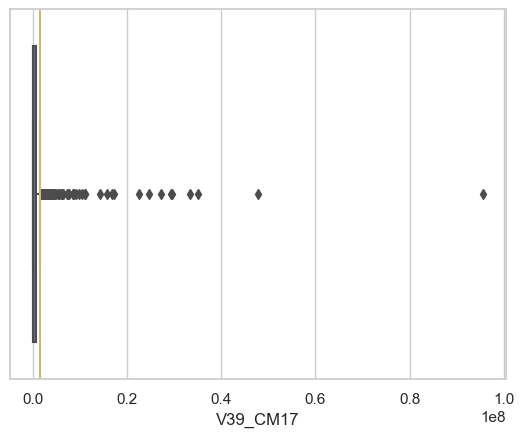

In [77]:
sns.set(style="whitegrid")
sns.boxplot(x=MAPA_CM_df['V39_CM17'])
plt.axvline(MAPA_CM_df['V39_CM17'].mean(), c='y')

In [83]:
#rango filtrado
iqr = MAPA_CM_df['V39_CM17'].quantile(0.75) - MAPA_CM_df['V39_CM17'].quantile(0.25)
filtro_inferior = MAPA_CM_df['V39_CM17'] > MAPA_CM_df['V39_CM17'].quantile(0.25) - (iqr * 1.5)
filtro_superior = MAPA_CM_df['V39_CM17'] < MAPA_CM_df['V39_CM17'].quantile(0.75) + (iqr * 1.5)

MAPA_CM_df_filtrado = MAPA_CM_df[filtro_inferior & filtro_superior]

In [79]:
MAPA_CM_df_filtrado

,CVE_ENT,CVE_MUN,NOM_MUN,CVEGEO,V01_POB20,V02_POB10,V03_TCPOB,V04_POB17,V05_AN10,V06_AN20,...,V32_GO11,V33_GO17,V34_TCGO,V35_AFGO17,V36_GIF11,V37_GIF17,V38_%GIT17,V39_CM17,V40_CMIP,V41_CPIF
392,12,019,Copalillo,12019,15598,14456,0.007632,15246.237581,2917,3551,...,5935555,28708373,0.300443,0.002633,4654229,28660775,0.499585,18,0.000238,6.280361e-07
207,08,003,Allende,08003,8487,8409,0.000924,8463.524335,242,304,...,21227076,51530051,0.159298,0.067035,12015528,1868070,0.034984,77,0.000022,4.121901e-05
414,12,075,Eduardo Neri,12075,53126,46158,0.014159,50931.806144,5260,6046,...,36988913,92129857,0.164273,0.032945,74387302,98546142,0.491736,79,0.000026,8.016549e-07
685,16,020,Cuitzeo,16020,29910,28227,0.005808,29394.826835,2201,2789,...,37590762,67298776,0.101931,0.133737,27180628,32980142,0.328884,89,0.000010,2.698594e-06
2023,30,036,Coacoatzintla,30036,11018,9416,0.015836,10510.705617,793,1308,...,11564279,17169035,0.068082,0.075835,14954609,13428413,0.433775,122,0.000094,9.085214e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,07,078,San Cristóbal de las Casas,07078,215874,185917,0.015052,206412.487694,16133,18706,...,224585428,434397488,0.116223,0.255799,89657974,205403047,0.285538,1560079,0.014040,7.595209e-03
89,07,108,Villaflores,07108,109536,98618,0.010555,106139.410549,9453,11487,...,90729043,147266842,0.084076,0.060237,96563942,177615530,0.543939,1569126,0.176884,8.834396e-03
1688,24,058,El Naranjo,24058,20959,20495,0.002241,20818.707678,881,1131,...,30636513,49595270,0.083595,0.142771,21446758,45713173,0.456352,1590536,0.224628,3.479382e-02
715,16,012,Buenavista,16012,45538,42234,0.007561,44520.540846,4540,4955,...,59127446,95524110,0.083230,0.128223,38190657,41342317,0.300099,1591492,0.129935,3.849547e-02


<Axes: >

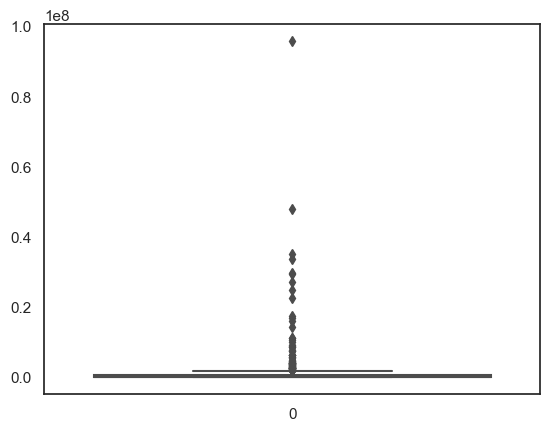

In [86]:
MAPA_CM_df_A=MAPA_CM_df.reset_index(drop=True)
sns.boxplot(MAPA_CM_df_A["V39_CM17"])

In [88]:
CM = MAPA_CM_df_filtrado['V39_CM17']
CM.max() - CM.min()

1659602

In [89]:
segmentos = pd.cut(CM, 10)
MAPA_CM_df_filtrado['V39_CM17'].groupby(segmentos).count()

V39_CM17
(-1641.602, 165978.2]     286
(165978.2, 331938.4]       43
(331938.4, 497898.6]       29
(497898.6, 663858.8]       19
(663858.8, 829819.0]       13
(829819.0, 995779.2]        6
(995779.2, 1161739.4]      10
(1161739.4, 1327699.6]      5
(1327699.6, 1493659.8]      5
(1493659.8, 1659620.0]      8
Name: V39_CM17, dtype: int64

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_12120\3340096056.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MAPA_CM_df_filtrado['V39_CM17'], kde=False, norm_hist=False, bins=100)


<Axes: xlabel='V39_CM17'>

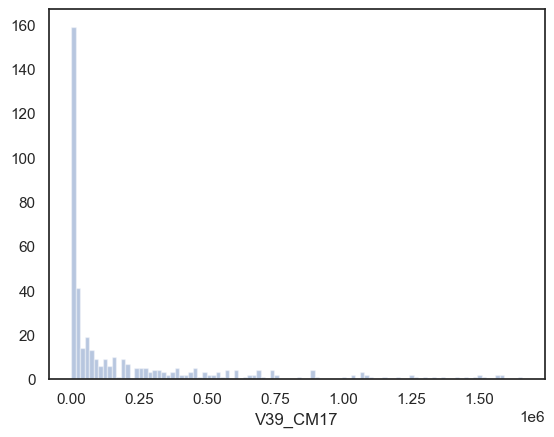

In [90]:
#histogramas
sns.set(style='white')
sns.distplot(MAPA_CM_df_filtrado['V39_CM17'], kde=False, norm_hist=False, bins=100)

In [91]:
print(f'Curtosis: {kurtosis(MAPA_CM_df_filtrado["V39_CM17"])}')
print(f'Asimetría: {skew(MAPA_CM_df_filtrado["V39_CM17"])}')

Curtosis: 4.177766925848282
Asimetría: 2.149187508673378


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_12120\1940144359.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MAPA_CM_df_filtrado["V39_CM17"], hist=False);


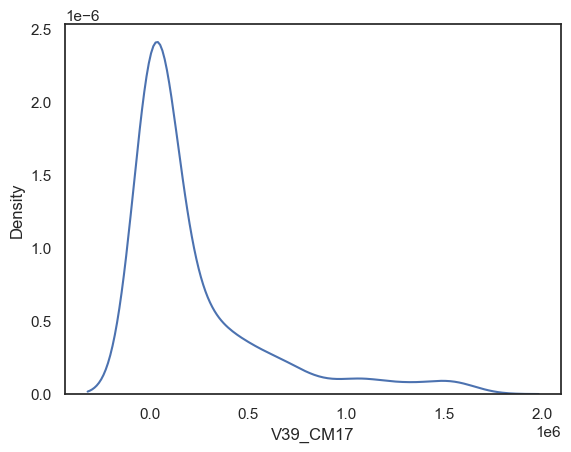

In [92]:
sns.distplot(MAPA_CM_df_filtrado["V39_CM17"], hist=False);

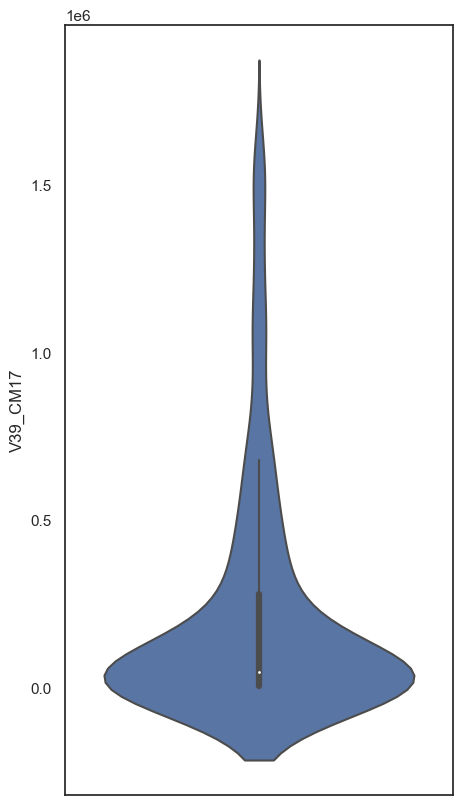

In [93]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=MAPA_CM_df_filtrado, y= 'V39_CM17');

In [94]:
correlaciones=MAPA_CM_df_filtrado.corr()
correlaciones

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_12120\102499220.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones=MAPA_CM_df_filtrado.corr()


,V01_POB20,V02_POB10,V03_TCPOB,V04_POB17,V05_AN10,V06_AN20,V07_TCAN,V08_AN17,V09_%AN,V10_EX20,...,V32_GO11,V33_GO17,V34_TCGO,V35_AFGO17,V36_GIF11,V37_GIF17,V38_%GIT17,V39_CM17,V40_CMIP,V41_CPIF
V01_POB20,1.000000,0.997006,0.114948,0.999671,0.824952,0.803662,-0.162557,0.810844,-0.246890,0.697240,...,0.926328,0.213249,-0.151201,-0.514348,0.939752,0.844199,-0.440957,0.144932,-0.132072,-0.051449
V02_POB10,0.997006,1.000000,0.074377,0.998616,0.828491,0.810689,-0.135078,0.816859,-0.245332,0.697885,...,0.933056,0.235195,-0.160376,-0.497318,0.936162,0.854465,-0.437918,0.148889,-0.134845,-0.052994
V03_TCPOB,0.114948,0.074377,1.000000,0.099208,0.052379,0.020175,-0.665332,0.028990,-0.317220,0.088270,...,0.067336,0.030387,0.131005,0.057450,0.060460,0.054818,-0.073723,0.047677,-0.071869,-0.057088
V04_POB17,0.999671,0.998616,0.099208,1.000000,0.826723,0.806514,-0.151825,0.813392,-0.246115,0.698067,...,0.928946,0.219607,-0.154588,-0.510175,0.939434,0.847731,-0.440327,0.146300,-0.132818,-0.051907
V05_AN10,0.824952,0.828491,0.052379,0.826723,1.000000,0.994886,-0.103933,0.997511,-0.034650,0.893654,...,0.696147,0.217367,-0.121815,-0.536134,0.839460,0.815253,-0.279181,0.179148,-0.112313,-0.069632
V06_AN20,0.803662,0.810689,0.020175,0.806514,0.994886,1.000000,-0.051685,0.999527,-0.028558,0.883815,...,0.679195,0.234780,-0.133443,-0.523641,0.825930,0.804430,-0.267588,0.180805,-0.113502,-0.070837
V07_TCAN,-0.162557,-0.135078,-0.665332,-0.151825,-0.103933,-0.051685,1.000000,-0.066973,0.141128,-0.113755,...,-0.130327,-0.046331,-0.078862,-0.055301,-0.101243,-0.102762,0.085090,-0.068277,0.058676,0.022953
V08_AN17,0.810844,0.816859,0.028990,0.813392,0.997511,0.999527,-0.066973,1.000000,-0.030366,0.887700,...,0.684771,0.229651,-0.130013,-0.528377,0.830889,0.808356,-0.271485,0.180551,-0.113170,-0.070485
V09_%AN,-0.246890,-0.245332,-0.317220,-0.246115,-0.034650,-0.028558,0.141128,-0.030366,1.000000,-0.018133,...,-0.267355,-0.177316,0.065462,-0.095227,-0.171193,-0.169209,0.446397,-0.136733,0.200472,-0.066869
V10_EX20,0.697240,0.697885,0.088270,0.698067,0.893654,0.883815,-0.113755,0.887700,-0.018133,1.000000,...,0.564713,0.145584,-0.126004,-0.538559,0.695828,0.742994,-0.184568,0.092758,-0.095018,-0.073464


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_12120\2258370346.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(MAPA_CM_df_filtrado.corr(), vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5);


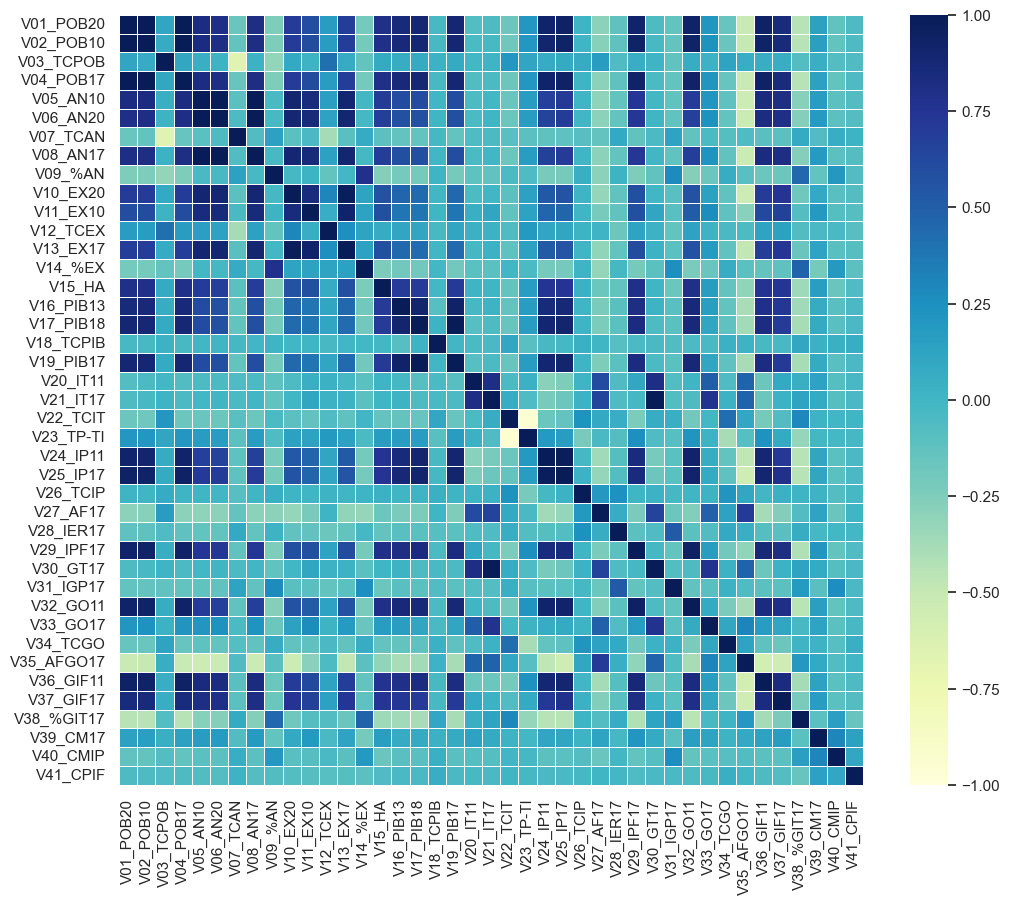

In [95]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(MAPA_CM_df_filtrado.corr(), vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5);

In [96]:
correlaciones_CM= correlaciones['V39_CM17'].sort_values(ascending=False)

In [97]:
correlaciones_CM

V39_CM17      1.000000
V40_CMIP      0.297649
V29_IPF17     0.211545
V11_EX10      0.190508
V06_AN20      0.180805
V08_AN17      0.180551
V05_AN10      0.179148
V37_GIF17     0.170525
V15_HA        0.159220
V32_GO11      0.153820
V02_POB10     0.148889
V04_POB17     0.146300
V01_POB20     0.144932
V41_CPIF      0.141424
V20_IT11      0.137516
V36_GIF11     0.136613
V33_GO17      0.130768
V27_AF17      0.128557
V13_EX17      0.120772
V25_IP17      0.114334
V24_IP11      0.109547
V10_EX20      0.092758
V35_AFGO17    0.090305
V17_PIB18     0.085720
V19_PIB17     0.082589
V30_GT17      0.081604
V21_IT17      0.081604
V16_PIB13     0.075347
V03_TCPOB     0.047677
V18_TCPIB     0.033977
V22_TCIT      0.021382
V34_TCGO      0.016812
V26_TCIP      0.016098
V23_TP-TI    -0.009097
V28_IER17    -0.020188
V12_TCEX     -0.036209
V07_TCAN     -0.068277
V31_IGP17    -0.095201
V38_%GIT17   -0.104827
V09_%AN      -0.136733
V14_%EX      -0.212081
Name: V39_CM17, dtype: float64

<Axes: xlabel='V39_CM17', ylabel='V15_HA'>

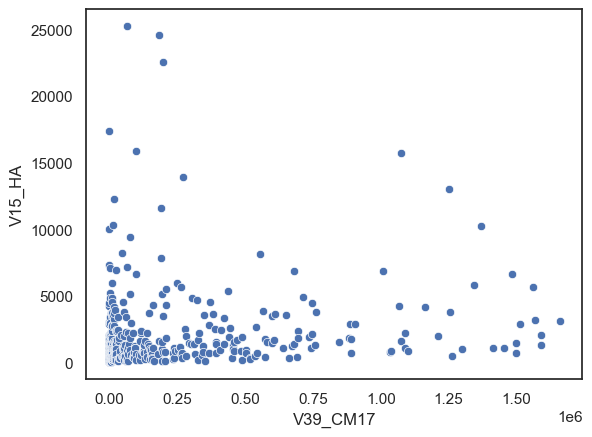

In [100]:
sns.scatterplot(x=MAPA_CM_df_filtrado['V39_CM17'], y=MAPA_CM_df_filtrado['V15_HA'])

<Axes: xlabel='V39_CM17', ylabel='V37_GIF17'>

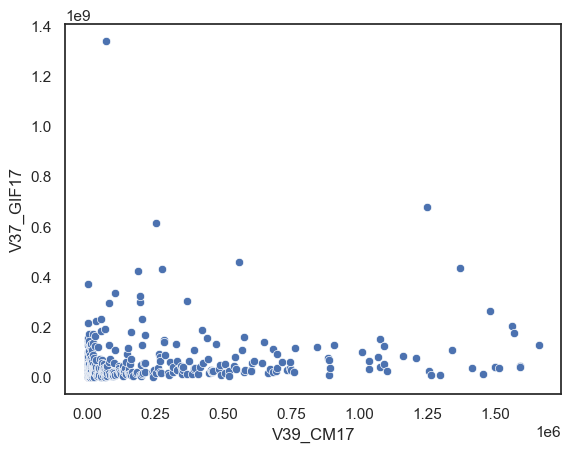

In [99]:
sns.scatterplot(x=MAPA_CM_df_filtrado['V39_CM17'], y=MAPA_CM_df_filtrado['V37_GIF17'])

<Axes: xlabel='V39_CM17', ylabel='V19_PIB17'>

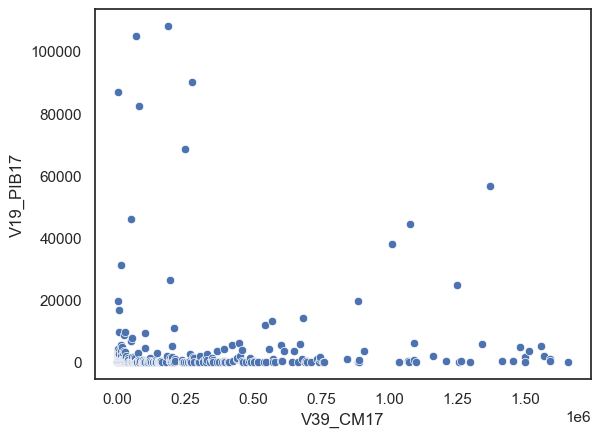

In [101]:
sns.scatterplot(x=MAPA_CM_df_filtrado['V39_CM17'], y=MAPA_CM_df_filtrado['V19_PIB17'])

In [ ]:
sns.pairplot(MAPA_CM_df_filtrado);

In [102]:
#HACER REGRESIÓN LINEAL SIMPLE (S4E5)

lr = LinearRegression()

lr.fit(MAPA_CM_df_filtrado['V37_GIF17'].to_frame(), MAPA_CM_df_filtrado['V39_CM17'])

LinearRegression()

In [103]:
y_predict = lr.predict(MAPA_CM_df_filtrado['V37_GIF17'].to_frame())

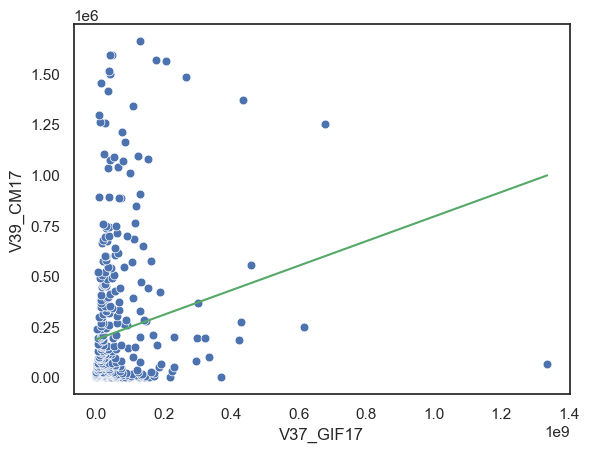

In [104]:
sns.scatterplot(x=MAPA_CM_df_filtrado['V37_GIF17'], y=MAPA_CM_df_filtrado['V39_CM17'], s=40);
sns.lineplot(x=MAPA_CM_df_filtrado['V37_GIF17'], y=y_predict, color='g');

In [105]:
lr.score(MAPA_CM_df_filtrado['V37_GIF17'].to_frame(), MAPA_CM_df_filtrado['V39_CM17'])

0.02907863414417733

In [109]:
#bootstrap
MAPA_CM_df_filtrado['V39_CM17'].sample(n=20, replace=False)

2039     22796
2406     18580
756     279091
328      77091
1963     11553
1732    315250
2401    191900
659     341423
245      99926
1392      7150
326      49736
786      10017
1964     22500
1025    490602
117     460624
2374    200000
2342    118703
1950    757793
746     889674
837       8600
Name: V39_CM17, dtype: int64

In [110]:
MAPA_CM_df_filtrado['V39_CM17'].sample(frac=0.1, replace=True)

581      503850
45        23500
1932      90000
546      456664
2137     556021
2096     131720
2049      14716
1971     205000
2377     265220
648        6500
1905      50000
2393     113840
546      456664
733      114000
1732     315250
2389      21510
1289       9000
1327      12130
937        2700
1832     184378
1408      24150
1257       6600
294       71500
1440      10807
352     1414657
1679      17727
2137     556021
2457      19500
957       51450
2029     421800
1401       4080
1706      31677
798      325000
154       18900
1197       1925
990         715
2027       5327
2434     713550
1706      31677
1408      24150
2392      23020
1217       3000
Name: V39_CM17, dtype: int64

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_12120\2282271193.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False);


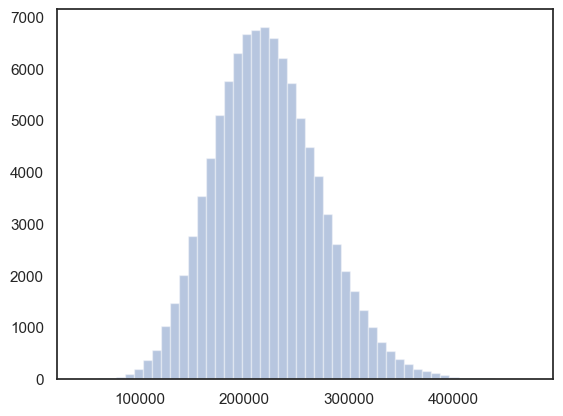

In [111]:
CM = MAPA_CM_df_filtrado['V39_CM17']

means = []

for i in range(100_000):
    sample = CM.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)
sns.distplot(serie_means, kde=False, norm_hist=False);

In [ ]:
# Configurar el gráfico
sns.set(style="whitegrid")

# Crear el histograma
sns.distplot(serie_means, kde=False, norm_hist=False)

# Ajustar los límites del eje x
plt.xlim(serie_means.min(), serie_means.max())

# Especificar los ticks del eje x manualmente
plt.xticks(range(int(serie_means.min()), int(serie_means.max())+1))

# Mostrar el gráfico
plt.show()

In [ ]:
serie_means.skew()

In [ ]:
serie_means.kurtosis()

In [113]:
#error estándar
print(f'Error estandar: {serie_means.std()}')

Error estandar: 50658.74474626488


In [135]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 42471.54
Valor máximo: 474483.76
Rango: 432012.22000000003


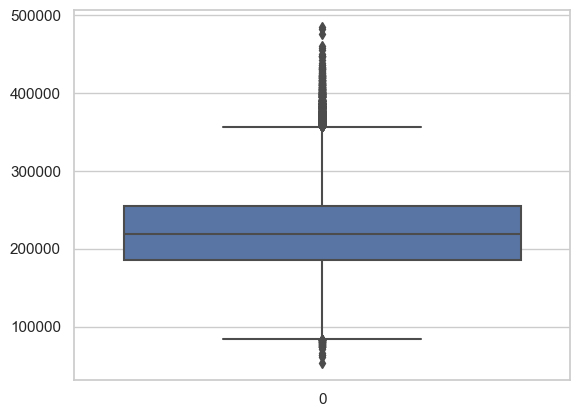

In [147]:
sns.boxplot(serie_means);

In [120]:
#intervalos de confianza

limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [127]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {CM.mean()} < {limite_superior}')


Intervalo de 95% confianza de la media: 130321.583 < 221878.8608490566 < 328067.122


In [128]:
mean_of_intervals = ((CM.mean() - limite_inferior) + (limite_superior - CM.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {CM.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 221878.8608490566 +/- 98872.7695


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_14948\4077346501.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False)


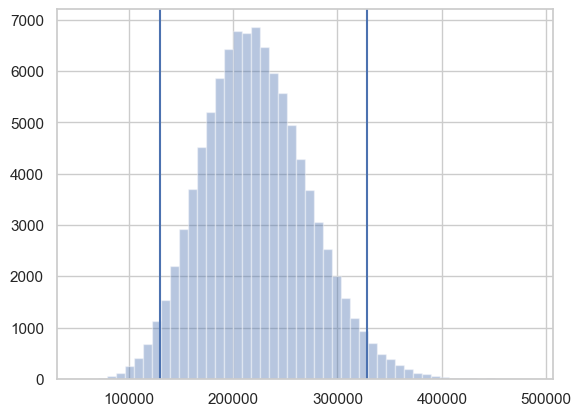

In [151]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

In [136]:
#entrenamiento y prueba
MAPA_CM_df_filtrado.isna().sum()

CVE_ENT       0
CVE_MUN       0
NOM_MUN       0
CVEGEO        0
V01_POB20     0
V02_POB10     0
V03_TCPOB     0
V04_POB17     0
V05_AN10      0
V06_AN20      0
V07_TCAN      0
V08_AN17      0
V09_%AN       0
V10_EX20      0
V11_EX10      0
V12_TCEX      0
V13_EX17      0
V14_%EX       0
V15_HA        0
V16_PIB13     0
V17_PIB18     0
V18_TCPIB     0
V19_PIB17     0
V20_IT11      0
V21_IT17      0
V22_TCIT      0
V23_TP-TI     0
V24_IP11      0
V25_IP17      0
V26_TCIP      0
V27_AF17      0
V28_IER17     0
V29_IPF17     0
V30_GT17      0
V31_IGP17     0
V32_GO11      0
V33_GO17      0
V34_TCGO      0
V35_AFGO17    0
V36_GIF11     0
V37_GIF17     0
V38_%GIT17    0
V39_CM17      0
V40_CMIP      0
V41_CPIF      0
dtype: int64

In [137]:
X = MAPA_CM_df_filtrado[['V37_GIF17', 'V19_PIB17']]
y = MAPA_CM_df_filtrado['V39_CM17']

In [138]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [139]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [140]:
#VALOR R2
lr.score(X_test, y_test)

-0.019721795027586086

In [141]:
#validación cruzada
scores = cross_validate(lr, X, y, scoring='r2')
scores

{'fit_time': array([0.00300312, 0.00200009, 0.00199986, 0.00286627, 0.0021596 ]),
 'score_time': array([0.00199842, 0.00100017, 0.00100017, 0.00050902, 0.00100183]),
 'test_score': array([-6.24294701e+04, -3.01533004e+03, -1.37211879e+02, -8.33497061e-01,
        -4.12204552e+00])}

In [142]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: -13117.394 +/- 24682.867


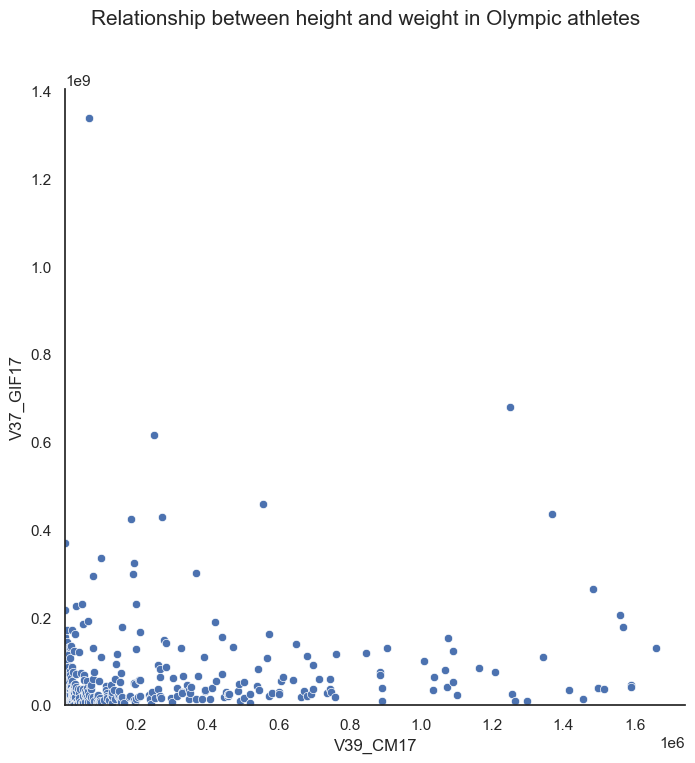

In [143]:
sns.set_style('white')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

sns.scatterplot(x=MAPA_CM_df_filtrado['V39_CM17'], y=MAPA_CM_df_filtrado['V37_GIF17'], ax=ax);

fig.suptitle('Relationship between height and weight in Olympic athletes', fontsize=15)

ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")

ax.set_xlim(110)
ax.set_ylim(0);

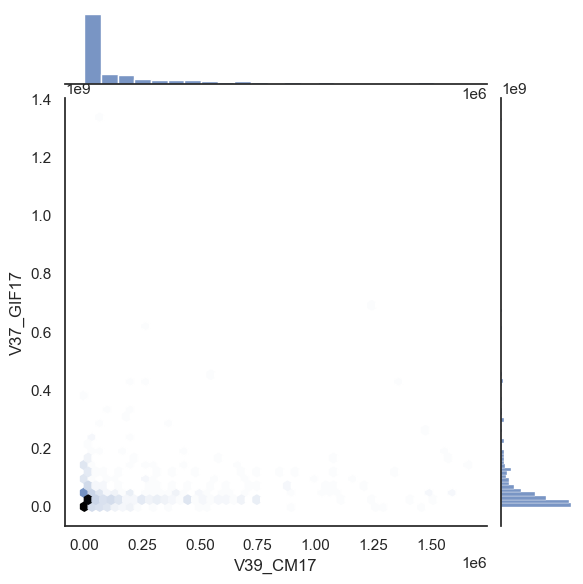

In [144]:
sns.jointplot(x='V39_CM17', y='V37_GIF17', data=MAPA_CM_df_filtrado, kind='hex', ratio=5, joint_kws={'gridsize': 50})


In [145]:
MAPA_CM_df_limpio = MAPA_CM_df_filtrado.replace([np.inf, -np.inf], np.nan).dropna()

In [146]:
X = MAPA_CM_df_limpio.drop(columns=['V39_CM17','CVE_ENT','CVE_MUN', 'NOM_MUN','CVEGEO' ])
y = MAPA_CM_df_limpio['V39_CM17']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [148]:
logreg = LogisticRegression()

In [149]:
logreg.fit(X_train, y_train)

C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [150]:
y_pred = logreg.predict(X_test)

y_pred

array([ 346920,  132179, 1036615,   12457,    2720,  100000,  273278,
         99926,    2615,   48449,   99926,  640687,   54041,  439813,
        313570,  680960,  273278,  300000,  200000,  366500,   12530,
        347600,   95890,  100000,    2615,   10000, 1068420,   12750,
        100000,  200000,    5327,    9720,   81000,  100000,    1925,
         60168,  573486,    4025,  200000,   10807,  487820,   54800,
         99926, 1498621,    9720,   14629,    3000,    9400,  143410,
         60840,    9400,  191900,   12530,  100000,    2615,  640687,
        273278,    9720,  265220,    2952,   95890,  191900,  265220,
        346920,    1550,  100000, 1560079,  191900,  206541, 1068420,
        452350,  640687,   81000,  147000,  200000,  573486,    2615,
          2952,    9000,   77091, 1068420, 1100504,  347600,  366500,
        366500,  191900, 1414657,    2615,  650000,  487820,  313570,
        100000,  640687,    2615,    2720,   77091,   10807,  206541,
        265220,   12

In [151]:
logreg.score(X_test, y_test)

0.0

In [153]:
MAPA_CM_df

,CVE_ENT,CVE_MUN,NOM_MUN,CVEGEO,V01_POB20,V02_POB10,V03_TCPOB,V04_POB17,V05_AN10,V06_AN20,...,V32_GO11,V33_GO17,V34_TCGO,V35_AFGO17,V36_GIF11,V37_GIF17,V38_%GIT17,V39_CM17,V40_CMIP,V41_CPIF
392,12,019,Copalillo,12019,15598,14456,0.007632,1.524624e+04,2917,3551,...,5935555,28708373,0.300443,0.002633,4654229,28660775,0.499585,18,0.000238,6.280361e-07
207,08,003,Allende,08003,8487,8409,0.000924,8.463524e+03,242,304,...,21227076,51530051,0.159298,0.067035,12015528,1868070,0.034984,77,0.000022,4.121901e-05
414,12,075,Eduardo Neri,12075,53126,46158,0.014159,5.093181e+04,5260,6046,...,36988913,92129857,0.164273,0.032945,74387302,98546142,0.491736,79,0.000026,8.016549e-07
685,16,020,Cuitzeo,16020,29910,28227,0.005808,2.939483e+04,2201,2789,...,37590762,67298776,0.101931,0.133737,27180628,32980142,0.328884,89,0.000010,2.698594e-06
2023,30,036,Coacoatzintla,30036,11018,9416,0.015836,1.051071e+04,793,1308,...,11564279,17169035,0.068082,0.075835,14954609,13428413,0.433775,122,0.000094,9.085214e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,23,008,Solidaridad,23008,333800,159310,0.076773,2.673704e+05,5142,3622,...,1504043074,1438248000,-0.007427,1.047489,200565962,289421000,0.146628,29552000,0.019616,1.021073e-01
2422,15,099,Texcoco,15099,277562,235151,0.016720,2.640925e+05,5089,5797,...,400281796,627415370,0.077784,0.466056,67660987,252247390,0.238802,33514570,0.114615,1.328639e-01
652,14,120,Zapopan,14120,1476491,1243756,0.017301,1.402433e+06,19873,23230,...,-1164216889,607454620,0.000000,-2.428946,0,1209516447,-0.563225,35162252,-0.023831,2.907133e-02
217,08,019,Chihuahua,08019,937674,819543,0.013557,9.005500e+05,8866,9039,...,0,-1620219250,inf,-0.869839,1835098264,512600645,-0.238698,47894986,0.033984,9.343528e-02


### Análisis Factorial

C:\Users\Alejandro\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Alejandro\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


nan nan
0.7578287535249124
[ 1.48000371e+01  4.09517829e+00  2.92232597e+00  2.28558840e+00
  2.13772217e+00  1.88612049e+00  1.56330190e+00  1.40390725e+00
  1.27939217e+00  1.00970390e+00  9.62957526e-01  8.06662527e-01
  7.32876631e-01  7.06804264e-01  6.29606379e-01  5.01959925e-01
  4.63399511e-01  3.80071657e-01  3.35144025e-01  2.92818755e-01
  2.65236070e-01  2.52003816e-01  2.43695732e-01  2.18122170e-01
  1.88797038e-01  1.37842703e-01  1.24397042e-01  9.81858784e-02
  8.88679370e-02  5.75927161e-02  4.69986423e-02  4.15439779e-02
  3.51526820e-02  3.81600653e-03  1.16880822e-03  5.55479546e-04
  3.96142893e-04  3.96703352e-05  6.57274788e-06  2.03908150e-06
 -4.24363546e-16]


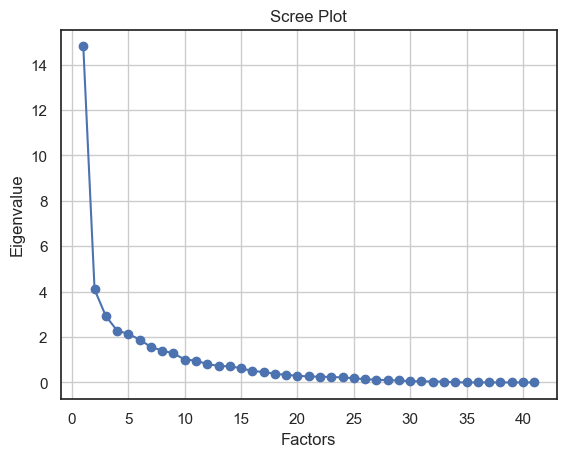

                  A1        A2        A3        A4        A5        A6  \
V01_POB20   0.646013  0.680614 -0.168354 -0.199069 -0.107581  0.060982   
V02_POB10   0.663078  0.652813 -0.180028 -0.202742 -0.109599  0.036190   
V03_TCPOB  -0.018254  0.071415  0.049651 -0.129082  0.082858  0.022655   
V04_POB17   0.652349  0.673061 -0.172619 -0.200287 -0.108319  0.053468   
V05_AN10    0.899578  0.349614 -0.028825 -0.027678 -0.070229  0.135170   
V06_AN20    0.900580  0.340948 -0.036934 -0.044243 -0.084348  0.117198   
V07_TCAN   -0.015715 -0.080053 -0.056770  0.098571 -0.062013 -0.055657   
V08_AN17    0.901830  0.344042 -0.034980 -0.039704 -0.080291  0.122578   
V09_%AN     0.013533 -0.185921 -0.023155  0.827780 -0.022094 -0.068945   
V10_EX20    0.940408  0.156943 -0.109144  0.006673 -0.046899  0.033304   
V11_EX10    0.921043  0.148844 -0.031322  0.055707 -0.038520  0.036596   
V12_TCEX    0.155179  0.043667 -0.014179 -0.004950 -0.072557  0.035279   
V13_EX17    0.962067  0.152262 -0.0948

In [152]:
#hacer CVEGEO index y borrar columnas

MAPA_CM_df_A=MAPA_CM_df.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN'])

MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print(chi_square_value, p_value)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print(kmo_model)

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=9, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8','A9']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
print(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8','A9']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
print(varianza_df)

# Separación de muestra por municipios metropolitanos y categorización

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

In [103]:
MAPA_CM_df_filtrado

,CVE_ENT,CVE_MUN,NOM_MUN,CVEGEO,V01_POB20,V02_POB10,V03_TCPOB,V04_POB17,V05_AN10,V06_AN20,...,V36_GIF11,V37_GIF17,V38_%GIT17,V39_CM17,V40_CMIP,V41_CPIF,CVE_METRO,TIPO,POSICIÓN,POSICIÓN_NUM
0,01,005,Jesús María,01005,129929,99590,0.026949,1.199662e+05,2522,2713,...,21697908,82154029,0.186221,542428,0.004450,0.006603,01.1.01,ZM,C,1
1,01,001,Aguascalientes,01001,948990,797010,0.017606,9.005800e+05,13469,16068,...,694327468,428785306,-0.199669,273278,0.000274,0.000637,01.1.01,ZM,C,1
2,02,005,Playas de Rosarito,02005,126890,90668,0.034183,1.147190e+05,2337,1957,...,93746917,22931757,0.041431,2900666,0.012911,0.126491,02.1.01,ZM,C,1
3,05,035,Torreón,05035,720848,639629,0.012026,6.954550e+05,8332,9333,...,346442801,761152944,-0.354439,29382307,0.027675,0.038602,05.1.01,ZM,C,1
4,05,022,Nava,05022,33129,27928,0.017225,3.147442e+04,507,658,...,7006625,48376786,0.311523,26500,0.000617,0.000548,05.1.03,ZM,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,15,115,Xonacatlán,15115,54633,46331,0.016619,5.199721e+04,1517,2095,...,21295570,59448564,0.300026,77650,0.004737,0.001306,15.1.01,ZM,P,0
168,15,087,Temoaya,15087,105766,90010,0.016262,1.007696e+05,4775,6591,...,104858434,178849180,0.439801,160470,0.010227,0.000897,15.1.01,ZM,P,0
169,15,067,Otzolotepec,15067,88783,78146,0.012843,8.544820e+04,3480,5093,...,69101330,75118470,0.257800,1880,0.000092,0.000025,15.1.01,ZM,C,1
170,15,058,Nezahualcóyotl,15058,1077208,1110565,-0.003045,1.087109e+06,17472,24207,...,496406613,1233519540,-0.574402,3114020,0.005580,0.002524,09.1.01,ZM,C,1


In [99]:
MAPA_CM_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Indicadores_CM_2017.csv"
MAPA_CM_df = pd.read_csv(MAPA_CM_ruta, dtype={'CVE_ENT': str, 'CVE_MUN':str,'':str,'CVEGEO':str})

#borrar filas donde Cont. Mej. es de 0
MAPA_CM_df = MAPA_CM_df[MAPA_CM_df.V39_CM17 != 0]

#Claves metropolitanas
Claves_CM_ruta = r"C:\Users\Alejandro\Downloads\DATA\Mun_Metro_Ub.csv"
Claves_df = pd.read_csv(Claves_CM_ruta, dtype={'CVE_METRO': str, 'TIPO':str,'CVEGEO':str,'POSICIÓN':str})

MAPA_CM_df_filtrado = MAPA_CM_df[MAPA_CM_df['CVEGEO'].isin(Claves_df['CVEGEO'])]

MAPA_CM_df_filtrado = pd.merge(MAPA_CM_df_filtrado, Claves_df[['CVEGEO','CVE_METRO','TIPO', 'POSICIÓN']] , 
                    on='CVEGEO', how='left')

# MAPA_CM_df_filtrado.drop('Clave compuesta del municipio', axis=1, inplace=True)

MAPA_CM_df_filtrado['POSICIÓN_NUM'] = MAPA_CM_df_filtrado['POSICIÓN'].map({'P': 0, 'C': 1})



In [50]:
# 1. Análisis de Varianza (ANOVA)
    
# Realizar ANOVA para cada indicador
for column in MAPA_CM_df_filtrado.columns:
    if MAPA_CM_df_filtrado[column].dtype == 'float64' or MAPA_CM_df_filtrado[column].dtype == 'int64':  # Filtramos columnas numéricas
        grupo_periferico = MAPA_CM_df_filtrado[MAPA_CM_df_filtrado['POSICIÓN'] == 'P'][column]
        grupo_central = MAPA_CM_df_filtrado[MAPA_CM_df_filtrado['POSICIÓN'] == 'C'][column]
        p_value = f_oneway(grupo_periferico, grupo_central).pvalue
        print(f"Indicador: {column}, p-value: {p_value}")
    

Indicador: V01_POB20, p-value: 0.00019353747979634493
Indicador: V02_POB10, p-value: 0.0002213115258289024
Indicador: V03_TCPOB, p-value: 0.8450677754692856
Indicador: V04_POB17, p-value: 0.00019928387231994316
Indicador: V05_AN10, p-value: 0.0015458257373639876
Indicador: V06_AN20, p-value: 0.0020797370639511446
Indicador: V07_TCAN, p-value: 0.43684352227416845
Indicador: V08_AN17, p-value: 0.0019029052260882003
Indicador: V09_%AN, p-value: 2.8882448023531337e-08
Indicador: V10_EX20, p-value: 0.006576084941618212
Indicador: V11_EX10, p-value: 0.004397338078251533
Indicador: V12_TCEX, p-value: 0.17066940711284206
Indicador: V13_EX17, p-value: 0.0056557722362322186
Indicador: V14_%EX, p-value: 2.419814698683106e-06
Indicador: V15_HA, p-value: 0.001039969996019059
Indicador: V16_PIB13, p-value: 0.0007548353990557266
Indicador: V17_PIB18, p-value: 0.0006708502850191515
Indicador: V18_TCPIB, p-value: nan
Indicador: V19_PIB17, p-value: 0.0006628970783323461
Indicador: V20_IT11, p-value: 0.3

C:\Users\Alejandro\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3906: RuntimeWarning: invalid value encountered in subtract
  alldata -= offset
C:\Users\Alejandro\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3914: RuntimeWarning: invalid value encountered in subtract
  ssbn += _square_of_sums(sample - offset,
C:\Users\Alejandro\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [102]:
# Realizar ANOVA para comparar la CM entre periféricos y centrales
grupo_periferico = MAPA_CM_df_filtrado[MAPA_CM_df_filtrado['POSICIÓN'] == 'P']['V39_CM17']
grupo_central = MAPA_CM_df_filtrado[MAPA_CM_df_filtrado['POSICIÓN'] == 'C']['V39_CM17']

p_value = f_oneway(grupo_periferico, grupo_central).pvalue
print("Valor p del ANOVA:", p_value)

if p_value < 0.05:
    print("Hay una diferencia significativa en la CM entre periféricos y centrales.")
else:
    print("No hay una diferencia significativa en la CM entre periféricos y centrales.")


Valor p del ANOVA: 0.007005174313184425
Hay una diferencia significativa en la CM entre periféricos y centrales.


In [57]:
# 2. Análisis de Regresión Logística

MAPA_CM_df_limpio = MAPA_CM_df_filtrado.replace([np.inf, -np.inf], np.nan).dropna()

X = MAPA_CM_df_limpio.drop(['Posición','Posición_Num','CVE_ENT','CVE_MUN', 'NOM_MUN','CVEGEO' ], axis=1)  # Eliminamos las columnas de clasificación
y = MAPA_CM_df_limpio['Posición_Num']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Precisión del modelo de regresión logística:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo de regresión logística: 0.7777777777777778
Matriz de confusión:
[[ 7  2]
 [ 4 14]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.88      0.78      0.82        18

    accuracy                           0.78        27
   macro avg       0.76      0.78      0.76        27
weighted avg       0.80      0.78      0.78        27



In [104]:
# Preparar los datos
X = MAPA_CM_df_filtrado[['V39_CM17']]
y = MAPA_CM_df_filtrado['POSICIÓN_NUM']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predecir la posición del municipio
y_pred = lr_model.predict(X_test)

# Evaluar el modelo
print("Precisión del modelo de regresión logística:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo de regresión logística: 0.7142857142857143
Matriz de confusión:
[[ 0 10]
 [ 0 25]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.71      1.00      0.83        25

    accuracy                           0.71        35
   macro avg       0.36      0.50      0.42        35
weighted avg       0.51      0.71      0.60        35



C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


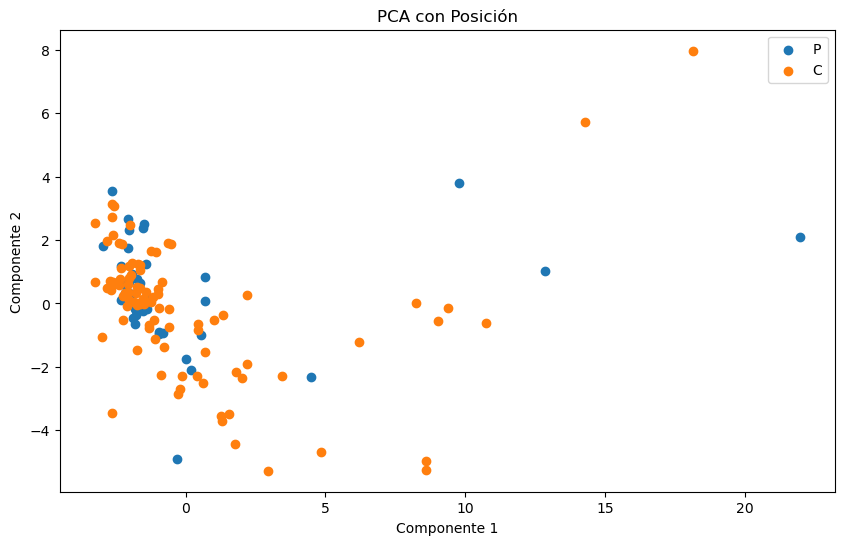

In [58]:
# 3. Análisis de Componentes Principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Posicion'] = MAPA_CM_df_filtrado['Posición']

plt.figure(figsize=(10, 6))
for posicion in ['P', 'C']:
    plt.scatter(df_pca[df_pca['Posicion'] == posicion]['Componente 1'], 
                df_pca[df_pca['Posicion'] == posicion]['Componente 2'], label=posicion)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA con Posición')
plt.legend()
plt.show()

### Subsecuentes

In [68]:
correlaciones = MAPA_CM_df_filtrado.corr()
correlaciones_CM = correlaciones['V39_CM17'].sort_values(ascending=False)
print(correlaciones_CM)

V39_CM17        1.000000
V15_HA          0.602695
V17_PIB18       0.498518
V19_PIB17       0.496857
V37_GIF17       0.467434
V16_PIB13       0.448323
V01_POB20       0.444429
V24_IP11        0.441038
V04_POB17       0.437019
V41_CPIF        0.434790
V02_POB10       0.418220
V26_TCIP        0.417067
V36_GIF11       0.391383
V25_IP17        0.269559
V05_AN10        0.248949
V11_EX10        0.241901
V08_AN17        0.234140
V06_AN20        0.227984
Posición_Num    0.223055
V13_EX17        0.205197
V20_IT11        0.204843
V23_TP-TI       0.203362
V10_EX20        0.188907
V29_IPF17       0.169244
V40_CMIP        0.144572
V33_GO17        0.128461
V32_GO11        0.121100
V18_TCPIB       0.030089
V03_TCPOB       0.005803
V07_TCAN       -0.068932
V35_AFGO17     -0.069608
V12_TCEX       -0.079251
V34_TCGO       -0.116520
V28_IER17      -0.125206
V27_AF17       -0.127453
V31_IGP17      -0.214360
V14_%EX        -0.227719
V22_TCIT       -0.228122
V09_%AN        -0.234038
V21_IT17       -0.289562


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_18468\698946158.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = MAPA_CM_df_filtrado.corr()


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
# Preparar los datos
X = MAPA_CM_df_limpio.drop(['Posición','CVE_ENT','CVE_MUN', 'NOM_MUN','CVEGEO','V39_CM17'], axis=1)  # Variables predictoras
y = MAPA_CM_df_limpio['V39_CM17']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = reg_model.predict(X_test)

# Evaluar el modelo
print("Coeficientes del modelo:", reg_model.coef_)
print("Intercepto del modelo:", reg_model.intercept_)
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente de determinación (R^2):", r2_score(y_test, y_pred))

Coeficientes del modelo: [ 6.42971241e+02  2.09893363e+02  1.50109820e+08 -8.62519333e+02
 -5.20570463e+04 -9.39919151e+04 -4.96287638e+07  1.44378528e+05
  2.77531419e+07  9.17977235e+02  4.53020904e+02 -2.51880482e+06
 -1.32150430e+03  2.84929589e+06  6.04090297e+02 -1.61411000e+02
 -3.48206732e+02 -5.08159547e+05  4.77671554e+02  1.14282662e-04
 -4.65294274e+04 -1.87862214e+08 -1.82827888e+08  1.57305931e-02
  7.67649262e-03 -7.53978418e+05 -8.29283331e+06 -4.24336002e-01
 -2.52997609e-03  4.65294303e+04 -2.71230629e-01 -5.68813965e-03
  4.89246313e-04 -1.29818695e+05  3.86239363e+06 -5.04854752e-03
  2.37510641e-02 -2.48806257e+06  1.97850747e+07  3.17082997e+07
  1.20399846e+06]
Intercepto del modelo: -266580.41028830316
Error cuadrático medio (MSE): 36135983797835.1
Coeficiente de determinación (R^2): -11.960266134666492


Varianza explicada por cada componente principal:
[4.01699493e-01 9.77325291e-02 6.02414232e-02 4.87641045e-02
 4.66427390e-02 4.50741556e-02 4.10556922e-02 3.25846037e-02
 2.98263798e-02 2.93381423e-02 2.42713417e-02 2.08391512e-02
 1.95150571e-02 1.58657798e-02 1.45382659e-02 1.17021267e-02
 1.13690102e-02 6.81982549e-03 5.92641521e-03 5.76676363e-03
 4.95680264e-03 4.62745909e-03 4.35613879e-03 3.87229396e-03
 2.56352705e-03 2.16202638e-03 1.94042922e-03 1.33230442e-03
 1.05200268e-03 9.04291937e-04 8.00962680e-04 6.51996780e-04
 6.21510941e-04 5.25005747e-04 3.35799776e-05 1.44086468e-05
 5.98086945e-06 3.94047651e-06 2.27565173e-06 5.69725454e-08
 5.93200297e-09 3.58263769e-33]


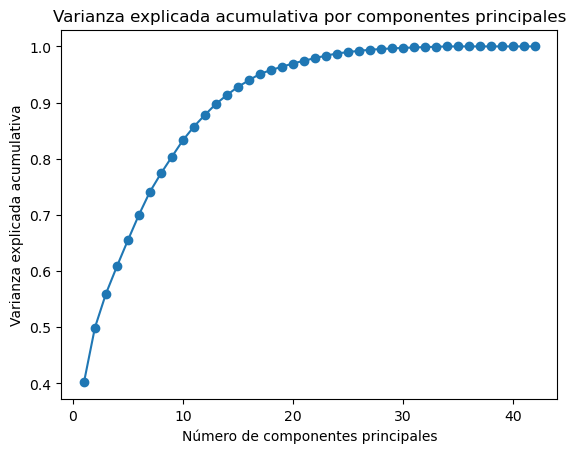

In [76]:
from sklearn.decomposition import PCA

# Preparar los datos
X = MAPA_CM_df_limpio.drop(columns=['Posición','CVE_ENT','CVE_MUN', 'NOM_MUN','CVEGEO'], axis=1)  # Eliminar la columna de posición

# Normalizar los datos (si no se hizo anteriormente)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explorar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)

# Visualizar la varianza explicada acumulativa
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.title('Varianza explicada acumulativa por componentes principales')
plt.show()


In [101]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Aquí va el resto de tu código...



In [123]:
from sklearn.cluster import KMeans

# Preparar los datos
X = MAPA_CM_df_limpio.drop(columns=['Posición','CVE_ENT','CVE_MUN', 'NOM_MUN','CVEGEO'], axis=1)  # Eliminar la columna de posición

# Determinar el número óptimo de clústeres utilizando el método del codo
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Distorsión')
plt.title('Método del codo')
plt.show()

# Aplicar KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
MAPA_CM_df_filtrado['Cluster'] = kmeans.labels_


NameError: name 'MAPA_CM_df_limpio' is not defined

In [107]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
import joblib

# Configuramos sklearn para utilizar un solo hilo
set_config(working_memory=None, n_jobs=1)

# Generamos los datos de ejemplo
np.random.seed(42)
X = np.random.randn(1000, 2)

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definimos una lista para almacenar las distorsiones
distortions = []

# Ejecutamos KMeans para diferentes números de clusters
for i in range(1, 11):
    with joblib.parallel_backend('threading', n_jobs=1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_scaled)
        distortions.append(kmeans.inertia_)

# Visualizamos los resultados
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


TypeError: set_config() got an unexpected keyword argument 'n_jobs'

# Metodología en limpio

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.metrics import mean_squared_error, r2_score

## Tratar DB

In [17]:
MAPA_CM_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Tratados\Indicadores_CM_2017.csv"
MAPA_CM_df = pd.read_csv(MAPA_CM_ruta, dtype={'CVE_ENT': str, 'CVE_MUN':str,'':str,'CVEGEO':str})

#borrar filas donde Cont. Mej. es de 0
MAPA_CM_df = MAPA_CM_df[MAPA_CM_df.V39_CM17 != 0]

#ordenar por valores en V39_CM17
MAPA_CM_df =  MAPA_CM_df.sort_values(by=['V39_CM17'])

# #borrar nulos
# MAPA_CM_df.dropna(inplace=True)

# #quitar valores infinitos
# MAPA_CM_df = MAPA_CM_df.replace([np.inf, -np.inf], np.nan).dropna()

#Claves metropolitanas
Claves_CM_ruta = r"C:\Users\Alejandro\Downloads\DATA\Mun_Metro_Ub.csv"
Claves_df = pd.read_csv(Claves_CM_ruta, dtype={'CVE_METRO': str, 'TIPO':str,'CVEGEO':str,'POSICIÓN':str})

MAPA_CM_df_Metro = MAPA_CM_df[MAPA_CM_df['CVEGEO'].isin(Claves_df['CVEGEO'])]

MAPA_CM_df_Metro = pd.merge(MAPA_CM_df_Metro, Claves_df[['CVEGEO','CVE_METRO','TIPO', 'POSICIÓN']] , 
                    on='CVEGEO', how='left')

#Guardar en csv
def save_to_csv(dataframe, filename):
    dataframe.to_csv(filename, index=False)

save_to_csv(MAPA_CM_df_Metro, r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Base Datos Metro Para Documento.csv")

# MAPA_CM_df_filtrado.drop('Clave compuesta del municipio', axis=1, inplace=True)

MAPA_CM_df_Metro['POSICIÓN_NUM'] = MAPA_CM_df_Metro['POSICIÓN'].map({'P': 0, 'C': 1})

#rango filtrado NAC
iqr = MAPA_CM_df['V39_CM17'].quantile(0.75) - MAPA_CM_df['V39_CM17'].quantile(0.25)
filtro_inferior = MAPA_CM_df['V39_CM17'] > MAPA_CM_df['V39_CM17'].quantile(0.25) - (iqr * 1.5)
filtro_superior = MAPA_CM_df['V39_CM17'] < MAPA_CM_df['V39_CM17'].quantile(0.75) + (iqr * 1.5)

MAPA_CM_df_filtrado = MAPA_CM_df[filtro_inferior & filtro_superior]

#rango filtrado METRO
iqr = MAPA_CM_df_Metro['V39_CM17'].quantile(0.75) - MAPA_CM_df_Metro['V39_CM17'].quantile(0.25)
filtro_inferior = MAPA_CM_df_Metro['V39_CM17'] > MAPA_CM_df_Metro['V39_CM17'].quantile(0.25) - (iqr * 1.5)
filtro_superior = MAPA_CM_df_Metro['V39_CM17'] < MAPA_CM_df_Metro['V39_CM17'].quantile(0.75) + (iqr * 1.5)

MAPA_CM_df_Metro_filtrado = MAPA_CM_df_Metro[filtro_inferior & filtro_superior]

## Correlación Simple

,V01_POB20,V02_POB10,V03_TCPOB,V04_POB17,V05_AN10,V06_AN20,V07_TCAN,V08_AN17,V09_%AN,V10_EX20,...,V32_GO11,V33_GO17,V34_TCGO,V35_AFGO17,V36_GIF11,V37_GIF17,V38_%GIT17,V39_CM17,V40_CMIP,V41_CPIF
V01_POB20,1.000000,0.994831,0.115441,0.999473,0.832778,0.827598,-0.153765,0.830475,-0.286839,0.741073,...,0.924766,0.960838,-0.033088,0.414775,0.772510,0.828938,-0.254794,0.316293,-0.116061,-0.026472
V02_POB10,0.994831,1.000000,0.068630,0.997573,0.832622,0.833717,-0.118294,0.834788,-0.276696,0.746726,...,0.923813,0.954359,-0.037656,0.385605,0.755427,0.828458,-0.248053,0.296038,-0.114511,-0.027859
V03_TCPOB,0.115441,0.068630,1.000000,0.098543,0.063012,0.023767,-0.677628,0.034621,-0.319511,0.090028,...,0.103094,0.096350,0.088694,0.315624,0.074253,0.078772,-0.073326,0.097718,-0.103544,-0.121380
V04_POB17,0.999473,0.997573,0.098543,1.000000,0.833849,0.830647,-0.141145,0.832964,-0.283678,0.743615,...,0.925142,0.959883,-0.034492,0.405354,0.768414,0.829612,-0.252861,0.310110,-0.115590,-0.026973
V05_AN10,0.832778,0.832622,0.063012,0.833849,1.000000,0.993040,-0.112913,0.996524,-0.086457,0.898553,...,0.722651,0.759584,-0.009781,0.282829,0.707059,0.791598,-0.108325,0.205773,-0.046209,-0.046865
V06_AN20,0.827598,0.833717,0.023767,0.830647,0.993040,1.000000,-0.052905,0.999394,-0.084917,0.886565,...,0.722037,0.754120,-0.021159,0.271570,0.693091,0.780275,-0.109815,0.194557,-0.056765,-0.048011
V07_TCAN,-0.153765,-0.118294,-0.677628,-0.141145,-0.112913,-0.052905,1.000000,-0.070376,0.164421,-0.126407,...,-0.135149,-0.137282,-0.085380,-0.267029,-0.123869,-0.117671,0.090458,-0.086229,0.070967,0.033963
V08_AN17,0.830475,0.834788,0.034621,0.832964,0.996524,0.999394,-0.070376,1.000000,-0.085536,0.891323,...,0.723203,0.756933,-0.017612,0.274914,0.698290,0.784531,-0.109672,0.197848,-0.053963,-0.047754
V09_%AN,-0.286839,-0.276696,-0.319511,-0.283678,-0.086457,-0.084917,0.164421,-0.085536,1.000000,-0.078136,...,-0.287936,-0.285736,0.035735,-0.434822,-0.204926,-0.208288,0.482480,-0.133414,0.127594,-0.078717
V10_EX20,0.741073,0.746726,0.090028,0.743615,0.898553,0.886565,-0.126407,0.891323,-0.078136,1.000000,...,0.647043,0.657448,-0.011299,0.164072,0.556923,0.755006,-0.047954,0.149549,-0.040858,-0.050977


V39_CM17      1.000000
V35_AFGO17    0.463242
V25_IP17      0.430772
V27_AF17      0.430189
V33_GO17      0.348911
V15_HA        0.348461
V21_IT17      0.346667
V30_GT17      0.346667
V37_GIF17     0.342550
V24_IP11      0.328924
V17_PIB18     0.323319
V19_PIB17     0.320487
V01_POB20     0.316293
V20_IT11      0.313225
V04_POB17     0.310110
V29_IPF17     0.302303
V40_CMIP      0.301608
V32_GO11      0.298925
V02_POB10     0.296038
V16_PIB13     0.287974
V36_GIF11     0.278615
V05_AN10      0.205773
V26_TCIP      0.199661
V08_AN17      0.197848
V41_CPIF      0.197156
V06_AN20      0.194557
V11_EX10      0.171957
V13_EX17      0.157316
V10_EX20      0.149549
V03_TCPOB     0.097718
V12_TCEX      0.024917
V18_TCPIB     0.024279
V23_TP-TI     0.018164
V22_TCIT      0.012911
V28_IER17    -0.026599
V34_TCGO     -0.040597
V38_%GIT17   -0.065516
V07_TCAN     -0.086229
V31_IGP17    -0.089669
V09_%AN      -0.133414
V14_%EX      -0.143786
Name: V39_CM17, dtype: float64

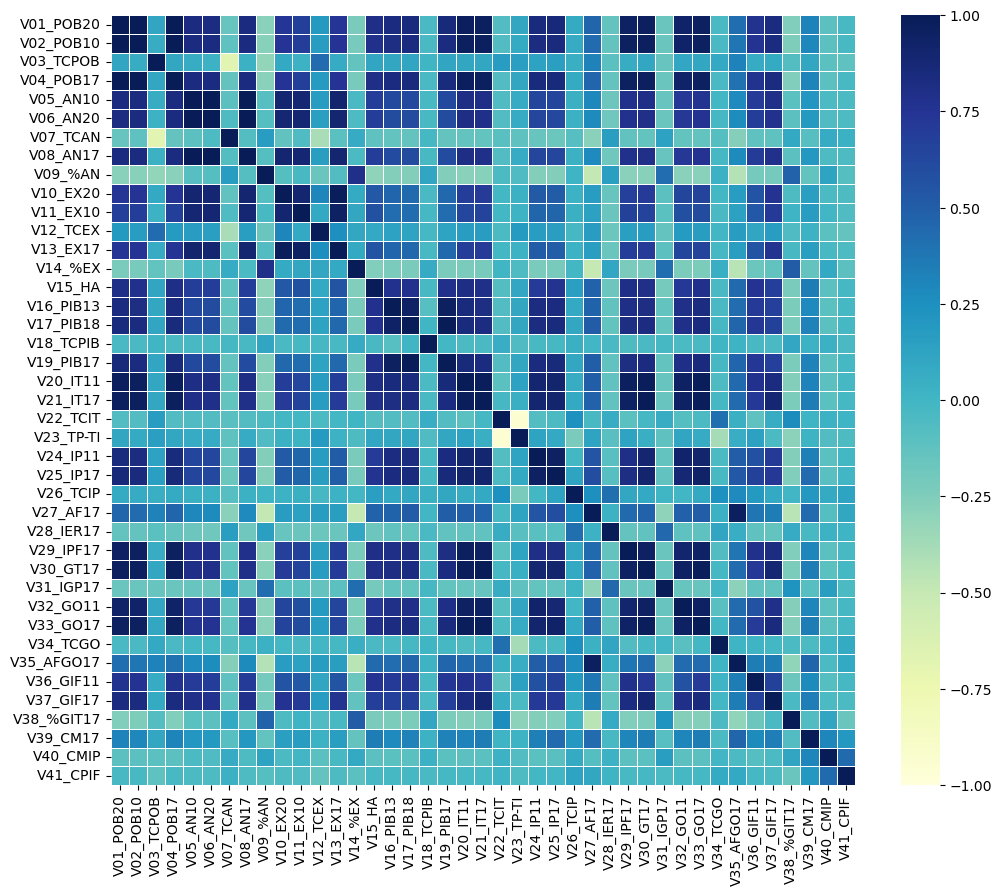

In [55]:
#Completa

MAPA_CM_dfA = MAPA_CM_df.select_dtypes(include=[int, float])

correlaciones=MAPA_CM_dfA.corr()
display(correlaciones)

plt.figure(figsize=(12, 10))
ax = sns.heatmap(MAPA_CM_dfA.corr(), vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5);

correlaciones_CM= correlaciones['V39_CM17'].sort_values(ascending=False)
correlaciones_CM

,V01_POB20,V02_POB10,V03_TCPOB,V04_POB17,V05_AN10,V06_AN20,V07_TCAN,V08_AN17,V09_%AN,V10_EX20,...,V32_GO11,V33_GO17,V34_TCGO,V35_AFGO17,V36_GIF11,V37_GIF17,V38_%GIT17,V39_CM17,V40_CMIP,V41_CPIF
V01_POB20,1.000000,0.997006,0.114948,0.999671,0.824952,0.803662,-0.162557,0.810844,-0.246890,0.697240,...,0.926328,0.958010,0.005670,0.428220,0.939752,0.844199,-0.226755,0.144932,-0.132072,-0.051449
V02_POB10,0.997006,1.000000,0.074377,0.998616,0.828491,0.810689,-0.135078,0.816859,-0.245332,0.697885,...,0.933056,0.959676,-0.006273,0.425185,0.936162,0.854465,-0.228204,0.148889,-0.134845,-0.052994
V03_TCPOB,0.114948,0.074377,1.000000,0.099208,0.052379,0.020175,-0.665332,0.028990,-0.317220,0.088270,...,0.067336,0.076756,0.141861,0.265023,0.060460,0.054818,-0.064977,0.047677,-0.071869,-0.057088
V04_POB17,0.999671,0.998616,0.099208,1.000000,0.826723,0.806514,-0.151825,0.813392,-0.246115,0.698067,...,0.928946,0.959152,0.001604,0.426560,0.939434,0.847731,-0.227242,0.146300,-0.132818,-0.051907
V05_AN10,0.824952,0.828491,0.052379,0.826723,1.000000,0.994886,-0.103933,0.997511,-0.034650,0.893654,...,0.696147,0.756554,0.010323,0.291837,0.839460,0.815253,-0.084207,0.179148,-0.112313,-0.069632
V06_AN20,0.803662,0.810689,0.020175,0.806514,0.994886,1.000000,-0.051685,0.999527,-0.028558,0.883815,...,0.679195,0.737413,-0.007138,0.284562,0.825930,0.804430,-0.080130,0.180805,-0.113502,-0.070837
V07_TCAN,-0.162557,-0.135078,-0.665332,-0.151825,-0.103933,-0.051685,1.000000,-0.066973,0.141128,-0.113755,...,-0.130327,-0.133173,-0.097768,-0.247800,-0.101243,-0.102762,0.067193,-0.068277,0.058676,0.022953
V08_AN17,0.810844,0.816859,0.028990,0.813392,0.997511,0.999527,-0.066973,1.000000,-0.030366,0.887700,...,0.684771,0.743874,-0.001798,0.286774,0.830889,0.808356,-0.081526,0.180551,-0.113170,-0.070485
V09_%AN,-0.246890,-0.245332,-0.317220,-0.246115,-0.034650,-0.028558,0.141128,-0.030366,1.000000,-0.018133,...,-0.267355,-0.252769,0.044260,-0.425196,-0.171193,-0.169209,0.453855,-0.136733,0.200472,-0.066869
V10_EX20,0.697240,0.697885,0.088270,0.698067,0.893654,0.883815,-0.113755,0.887700,-0.018133,1.000000,...,0.564713,0.608763,-0.013300,0.156965,0.695828,0.742994,-0.009706,0.092758,-0.095018,-0.073464


V39_CM17      1.000000
V40_CMIP      0.297649
V29_IPF17     0.211545
V27_AF17      0.207990
V35_AFGO17    0.206727
V11_EX10      0.190508
V06_AN20      0.180805
V08_AN17      0.180551
V05_AN10      0.179148
V30_GT17      0.176797
V21_IT17      0.176797
V37_GIF17     0.170525
V33_GO17      0.170050
V20_IT11      0.162962
V15_HA        0.159214
V32_GO11      0.153820
V02_POB10     0.148889
V04_POB17     0.146300
V01_POB20     0.144932
V41_CPIF      0.141424
V36_GIF11     0.136613
V13_EX17      0.120772
V25_IP17      0.114334
V24_IP11      0.109547
V10_EX20      0.092758
V17_PIB18     0.085720
V19_PIB17     0.082585
V16_PIB13     0.075348
V03_TCPOB     0.047677
V34_TCGO      0.034740
V22_TCIT      0.032806
V26_TCIP      0.016098
V18_TCPIB     0.013620
V23_TP-TI    -0.019148
V12_TCEX     -0.036209
V28_IER17    -0.063747
V07_TCAN     -0.068277
V38_%GIT17   -0.091272
V31_IGP17    -0.136132
V09_%AN      -0.136733
V14_%EX      -0.212081
Name: V39_CM17, dtype: float64

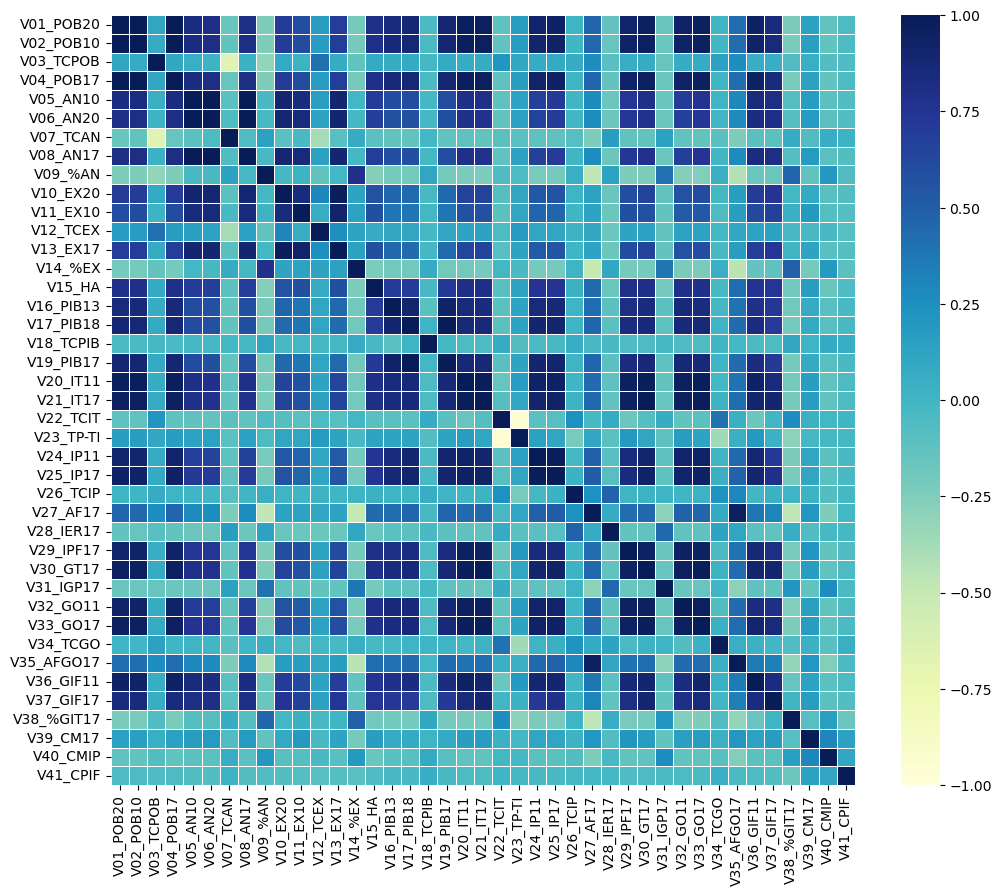

In [56]:
#Completa Filtrada

MAPA_CM_dfA = MAPA_CM_df_filtrado.select_dtypes(include=[int, float])

correlaciones=MAPA_CM_dfA.corr()
display(correlaciones)

plt.figure(figsize=(12, 10))
ax = sns.heatmap(MAPA_CM_dfA.corr(), vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5);

correlaciones_CM= correlaciones['V39_CM17'].sort_values(ascending=False)
correlaciones_CM

,V01_POB20,V02_POB10,V03_TCPOB,V04_POB17,V05_AN10,V06_AN20,V07_TCAN,V08_AN17,V09_%AN,V10_EX20,...,V33_GO17,V34_TCGO,V35_AFGO17,V36_GIF11,V37_GIF17,V38_%GIT17,V39_CM17,V40_CMIP,V41_CPIF,POSICIÓN_NUM
V01_POB20,1.000000,0.994040,-0.067771,0.999387,0.901311,0.886515,-0.036506,0.891595,-0.292195,0.799143,...,0.956371,-0.066647,0.358485,0.747275,0.834909,-0.305762,0.403782,-0.134768,-0.015551,0.291351
V02_POB10,0.994040,1.000000,-0.122481,0.997211,0.899279,0.891603,0.009699,0.894658,-0.276095,0.806759,...,0.948680,-0.069283,0.318081,0.727408,0.834510,-0.295105,0.371100,-0.133343,-0.031858,0.289185
V03_TCPOB,-0.067771,-0.122481,1.000000,-0.088438,-0.120765,-0.156371,-0.772856,-0.147362,-0.234492,-0.091825,...,-0.073849,0.058126,0.261915,-0.074911,-0.101765,0.009420,0.079074,0.001968,0.121006,0.002873
V04_POB17,0.999387,0.997211,-0.088438,1.000000,0.902054,0.889510,-0.019322,0.893959,-0.286884,0.802466,...,0.955189,-0.067472,0.345203,0.742451,0.835731,-0.302755,0.393717,-0.134319,-0.020905,0.290912
V05_AN10,0.901311,0.899279,-0.120765,0.902054,1.000000,0.995319,0.055843,0.997665,-0.076990,0.886274,...,0.827780,0.005940,0.256654,0.727454,0.789177,-0.186375,0.226467,-0.119701,-0.041426,0.264939
V06_AN20,0.886515,0.891603,-0.156371,0.889510,0.995319,1.000000,0.109887,0.999590,-0.052914,0.881833,...,0.811821,0.006062,0.231144,0.705026,0.776715,-0.173140,0.200585,-0.112327,-0.051336,0.259368
V07_TCAN,-0.036506,0.009699,-0.772856,-0.019322,0.055843,0.109887,1.000000,0.095053,0.352429,0.032271,...,-0.032432,-0.076267,-0.286855,-0.026517,0.004884,0.097133,-0.113297,0.103461,-0.087824,-0.065991
V08_AN17,0.891595,0.894658,-0.147362,0.893959,0.997665,0.999590,0.095053,1.000000,-0.059758,0.883960,...,0.817132,0.006287,0.238037,0.712174,0.780926,-0.177031,0.207885,-0.114587,-0.048823,0.261056
V09_%AN,-0.292195,-0.276095,-0.234492,-0.286884,-0.076990,-0.052914,0.352429,-0.059758,1.000000,-0.095602,...,-0.295508,0.089224,-0.350225,-0.191640,-0.222495,0.490540,-0.197382,0.244053,-0.050257,-0.396513
V10_EX20,0.799143,0.806759,-0.091825,0.802466,0.886274,0.881833,0.032271,0.883960,-0.095602,1.000000,...,0.713445,-0.010274,0.132555,0.543510,0.756624,-0.084179,0.180884,-0.093900,-0.073772,0.223593


V39_CM17        1.000000
V25_IP17        0.582722
V15_HA          0.518066
V27_AF17        0.505220
V35_AFGO17      0.497808
V41_CPIF        0.483206
V33_GO17        0.462335
V21_IT17        0.451132
V30_GT17        0.451132
V26_TCIP        0.432805
V17_PIB18       0.431570
V37_GIF17       0.430085
V19_PIB17       0.427001
V24_IP11        0.421561
V01_POB20       0.403782
V20_IT11        0.398231
V04_POB17       0.393717
V29_IPF17       0.383860
V32_GO11        0.378075
V16_PIB13       0.376202
V02_POB10       0.371100
V36_GIF11       0.353156
V05_AN10        0.226467
V11_EX10        0.218582
V08_AN17        0.207885
POSICIÓN_NUM    0.204921
V06_AN20        0.200585
V40_CMIP        0.198652
V13_EX17        0.192945
V10_EX20        0.180884
V03_TCPOB       0.079074
V23_TP-TI       0.063409
V18_TCPIB       0.050495
V22_TCIT       -0.029126
V12_TCEX       -0.039244
V34_TCGO       -0.073612
V28_IER17      -0.080419
V07_TCAN       -0.113297
V38_%GIT17     -0.142264
V31_IGP17      -0.180981


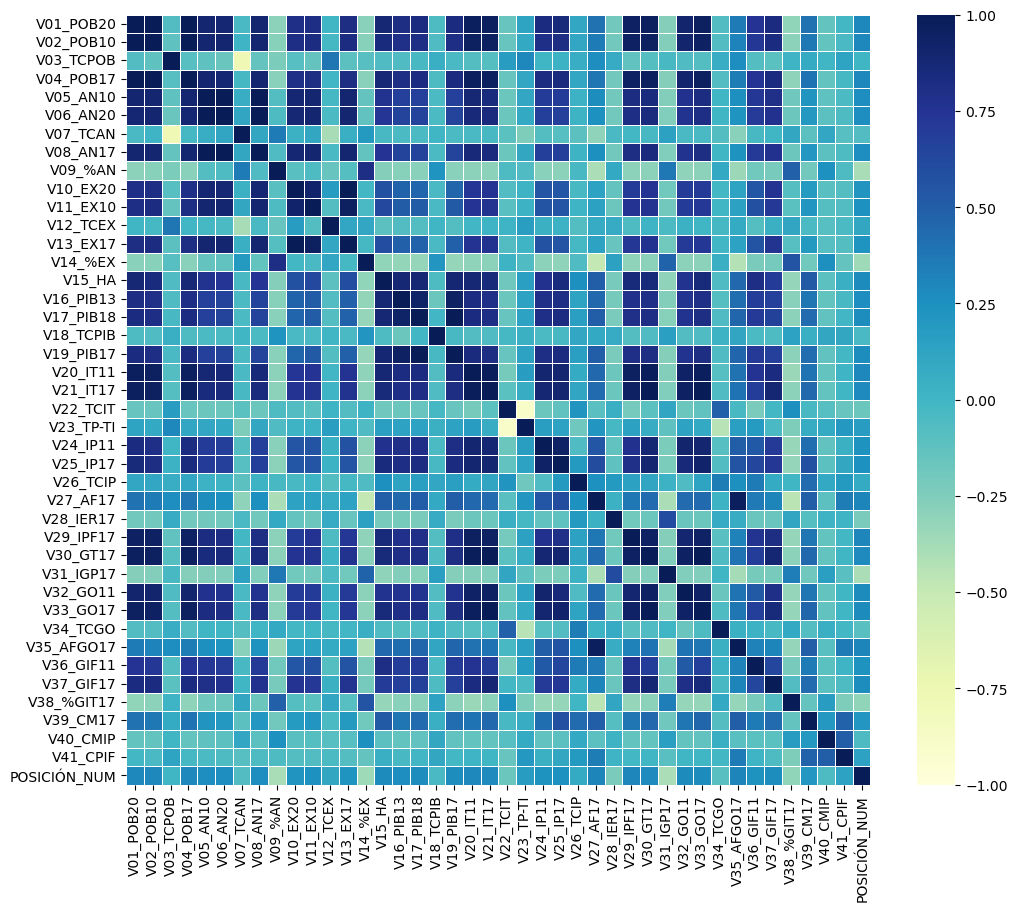

In [57]:
#Metropolitanos

MAPA_CM_dfA = MAPA_CM_df_Metro.select_dtypes(include=[int, float])

correlaciones=MAPA_CM_dfA.corr()
display(correlaciones)

plt.figure(figsize=(12, 10))
ax = sns.heatmap(MAPA_CM_dfA.corr(), vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5);

correlaciones_CM= correlaciones['V39_CM17'].sort_values(ascending=False)
correlaciones_CM

,V01_POB20,V02_POB10,V03_TCPOB,V04_POB17,V05_AN10,V06_AN20,V07_TCAN,V08_AN17,V09_%AN,V10_EX20,...,V33_GO17,V34_TCGO,V35_AFGO17,V36_GIF11,V37_GIF17,V38_%GIT17,V39_CM17,V40_CMIP,V41_CPIF,POSICIÓN_NUM
V01_POB20,1.000000,0.995278,-0.070728,0.999513,0.914001,0.903012,-0.026824,0.906916,-0.241219,0.845628,...,0.959610,-0.020403,0.369320,0.877701,0.803576,-0.295890,0.220417,-0.164783,-0.119401,0.277931
V02_POB10,0.995278,1.000000,-0.121125,0.997780,0.907478,0.902487,0.015219,0.904636,-0.232052,0.842813,...,0.961438,-0.031965,0.351420,0.858826,0.818747,-0.289337,0.233233,-0.163408,-0.121681,0.282821
V03_TCPOB,-0.070728,-0.121125,1.000000,-0.090434,-0.109980,-0.138753,-0.768772,-0.131559,-0.217839,-0.076655,...,-0.103435,0.131014,0.178969,-0.086674,-0.126681,0.045098,-0.052204,0.033833,0.096399,-0.010966
V04_POB17,0.999513,0.997780,-0.090434,1.000000,0.913177,0.904050,-0.010632,0.907419,-0.237870,0.845710,...,0.961177,-0.024514,0.363279,0.873068,0.808754,-0.294250,0.224380,-0.164330,-0.120198,0.279586
V05_AN10,0.914001,0.907478,-0.109980,0.913177,1.000000,0.995839,0.052319,0.997961,-0.027946,0.905668,...,0.852881,0.041737,0.283827,0.878853,0.782793,-0.168353,0.205922,-0.151782,-0.120985,0.242143
V06_AN20,0.903012,0.902487,-0.138753,0.904050,0.995839,1.000000,0.098980,0.999621,-0.009941,0.903044,...,0.845272,0.037269,0.272712,0.863112,0.780598,-0.158572,0.214831,-0.149222,-0.122017,0.239530
V07_TCAN,-0.026824,0.015219,-0.768772,-0.010632,0.052319,0.098980,1.000000,0.086106,0.322601,0.034888,...,-0.001510,-0.093239,-0.219089,0.006369,0.030704,0.057067,0.047389,0.052320,-0.075156,-0.051980
V08_AN17,0.906916,0.904636,-0.131559,0.907419,0.997961,0.999621,0.086106,1.000000,-0.015017,0.904562,...,0.848131,0.038714,0.275804,0.868486,0.781683,-0.161553,0.212334,-0.149944,-0.121780,0.240382
V09_%AN,-0.241219,-0.232052,-0.217839,-0.237870,-0.027946,-0.009941,0.322601,-0.015017,1.000000,-0.061476,...,-0.254184,0.087226,-0.326729,-0.153843,-0.163966,0.485549,-0.127470,0.270570,-0.043408,-0.390260
V10_EX20,0.845628,0.842813,-0.076655,0.845710,0.905668,0.903044,0.034888,0.904562,-0.061476,1.000000,...,0.778558,-0.006747,0.197317,0.743268,0.756240,-0.090348,0.200170,-0.136733,-0.145873,0.214521


V39_CM17        1.000000
V41_CPIF        0.501153
V35_AFGO17      0.384528
V27_AF17        0.380013
V32_GO11        0.279404
V21_IT17        0.278454
V30_GT17        0.278454
V29_IPF17       0.266114
V33_GO17        0.264974
V37_GIF17       0.252717
V24_IP11        0.244574
V25_IP17        0.242471
V02_POB10       0.233233
V20_IT11        0.230697
V11_EX10        0.228359
V04_POB17       0.224380
V01_POB20       0.220417
V06_AN20        0.214831
V13_EX17        0.212424
V08_AN17        0.212334
V05_AN10        0.205922
V10_EX20        0.200170
V15_HA          0.180346
POSICIÓN_NUM    0.166883
V40_CMIP        0.124672
V36_GIF11       0.122226
V19_PIB17       0.117004
V17_PIB18       0.114606
V16_PIB13       0.114085
V07_TCAN        0.047389
V18_TCPIB       0.007285
V23_TP-TI      -0.004680
V34_TCGO       -0.019498
V22_TCIT       -0.019563
V12_TCEX       -0.024871
V26_TCIP       -0.035994
V03_TCPOB      -0.052204
V28_IER17      -0.093549
V09_%AN        -0.127470
V38_%GIT17     -0.189862


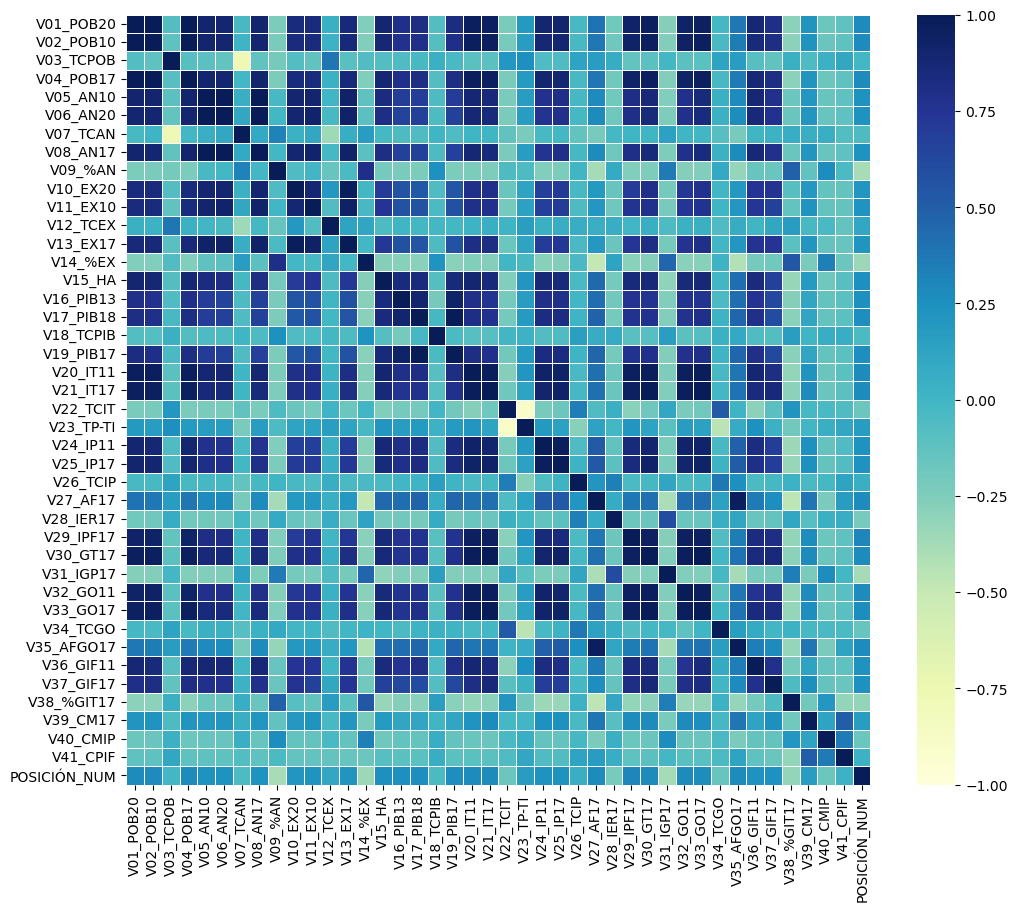

In [58]:
#Metropolitanos Filtrados

MAPA_CM_dfA = MAPA_CM_df_Metro_filtrado.select_dtypes(include=[int, float])

correlaciones=MAPA_CM_dfA.corr()
display(correlaciones)

plt.figure(figsize=(12, 10))
ax = sns.heatmap(MAPA_CM_dfA.corr(), vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5);

correlaciones_CM= correlaciones['V39_CM17'].sort_values(ascending=False)
correlaciones_CM

## Modelo regresión lineal múltiple - predecir CM en base a TODO

In [61]:
#Totales

#borrar nulos
MAPA_CM_df_A=MAPA_CM_df.dropna()
#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

# Preparar los datos
X = MAPA_CM_df_A.drop(['CVE_ENT','CVE_MUN', 'NOM_MUN','CVEGEO','V39_CM17'], axis=1)  # Variables predictoras
y = MAPA_CM_df_A['V39_CM17']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = reg_model.predict(X_test)

# Evaluar el modelo
print("Coeficientes del modelo:", reg_model.coef_)
print("Intercepto del modelo:", reg_model.intercept_)
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente de determinación (R^2):", r2_score(y_test, y_pred))

Coeficientes del modelo: [-2.70081670e+02 -2.53649100e+02 -2.97014103e+06  5.29357132e+02
 -6.95158212e+02  1.88285347e+03  1.13931825e+06 -1.53233159e+03
  5.52279167e+06 -8.48973755e+01 -6.48700054e+01 -6.88393934e+06
  1.62542329e+02  3.81376795e+06 -3.20722439e+01 -8.34730795e+01
  3.92959803e+02 -1.37559587e+06 -4.99885321e+02 -4.84907344e-03
 -7.62398049e+00 -5.15335850e+06  2.18322013e+06 -9.04338865e-03
  2.02831675e-02 -3.71327858e+06 -6.48582236e+07 -2.86220997e+00
  1.13834842e-02  7.60370827e+00 -4.23748954e-02  5.35056220e-03
  1.26073820e-02  7.70873620e+06  6.02420015e+07 -1.17500456e-02
  2.73208398e-02 -5.66815009e+06  1.81509141e+07 -1.32733460e+05]
Intercepto del modelo: -2126943.196719014
Error cuadrático medio (MSE): 17083703709914.2
Coeficiente de determinación (R^2): 0.43625469448739707


In [52]:
#Metropolitanos

#borrar nulos
MAPA_CM_df_Metro_A=MAPA_CM_df_Metro.dropna()
#quitar valores infinitos
MAPA_CM_df_Metro_A = MAPA_CM_df_Metro_A.replace([np.inf, -np.inf], np.nan).dropna()

# Preparar los datos
X = MAPA_CM_df_Metro_A.drop(['POSICIÓN','CVE_ENT','CVE_MUN', 'NOM_MUN','CVEGEO','V39_CM17','CVE_METRO','TIPO'], axis=1)  # Variables predictoras
y = MAPA_CM_df_Metro_A['V39_CM17']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = reg_model.predict(X_test)

# Evaluar el modelo
print("Coeficientes del modelo:", reg_model.coef_)
print("Intercepto del modelo:", reg_model.intercept_)
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente de determinación (R^2):", r2_score(y_test, y_pred))

Coeficientes del modelo: [ 6.89627220e+02  2.31248073e+02 -5.97481282e+07 -9.17042370e+02
 -2.19488214e+04 -3.82643325e+04 -6.26403152e+06  5.90817222e+04
 -7.41518333e+05  4.86906585e+02  6.26584276e+02  1.33547695e+07
 -9.04444717e+02 -1.32380456e+05  5.95119581e+02 -5.21642833e+01
 -6.48158728e+01 -1.70491439e+06  7.86023919e+01 -1.35407875e-02
 -1.18503976e+02 -3.34167721e+07 -2.63312244e+07  5.20010313e-03
 -3.65716028e-03  7.09747627e+05 -3.85357693e+07 -4.78395405e+00
 -1.52542912e-02  1.18496215e+02  4.17838993e-01  2.67322504e-02
  9.59646823e-03  4.67733736e+06  3.00553411e+07  1.26305118e-02
  1.60380819e-02  2.64296432e+05  5.19653064e+06  4.92318890e+07
  5.12534035e+05]
Intercepto del modelo: -635254.2336007156
Error cuadrático medio (MSE): 26813485604864.758
Coeficiente de determinación (R^2): 0.23786107907757692


## ANOVA Centrales / Periféricos

In [62]:
# 1. Análisis de Varianza (ANOVA)
    
# Realizar ANOVA para cada indicador
for column in MAPA_CM_df_Metro.columns:
    if MAPA_CM_df_Metro[column].dtype == 'float64' or MAPA_CM_df_Metro[column].dtype == 'int64':  # Filtramos columnas numéricas
        grupo_periferico = MAPA_CM_df_Metro[MAPA_CM_df_Metro['POSICIÓN'] == 'P'][column]
        grupo_central = MAPA_CM_df_Metro[MAPA_CM_df_Metro['POSICIÓN'] == 'C'][column]
        p_value = f_oneway(grupo_periferico, grupo_central).pvalue
        print(f"Indicador: {column}, p-value: {p_value}")
        if p_value < 0.05:
            print("SI hay una diferencia significativa entre periféricos y centrales.")
        else:
            print("NO hay una diferencia significativa entre periféricos y centrales.")

Indicador: V01_POB20, p-value: 0.0001054760299682938
SI hay una diferencia significativa entre periféricos y centrales.
Indicador: V02_POB10, p-value: 0.00011932838663118595
SI hay una diferencia significativa entre periféricos y centrales.
Indicador: V03_TCPOB, p-value: 0.9701675096869478
NO hay una diferencia significativa entre periféricos y centrales.
Indicador: V04_POB17, p-value: 0.00010815837116722013
SI hay una diferencia significativa entre periféricos y centrales.
Indicador: V05_AN10, p-value: 0.00044428347341126355
SI hay una diferencia significativa entre periféricos y centrales.
Indicador: V06_AN20, p-value: 0.0005908972400668624
SI hay una diferencia significativa entre periféricos y centrales.
Indicador: V07_TCAN, p-value: 0.38973774640580927
NO hay una diferencia significativa entre periféricos y centrales.
Indicador: V08_AN17, p-value: 0.0005423354937551027
SI hay una diferencia significativa entre periféricos y centrales.
Indicador: V09_%AN, p-value: 7.257449571459537

C:\Users\Alejandro\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4178: RuntimeWarning: invalid value encountered in subtract
  alldata -= offset
C:\Users\Alejandro\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4186: RuntimeWarning: invalid value encountered in subtract
  ssbn += _square_of_sums(sample - offset,
C:\Users\Alejandro\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


### Reg Logística: Predecir posición a partir de CM

In [64]:

# Preparar los datos
X = MAPA_CM_df_Metro[['V39_CM17']]
y = MAPA_CM_df_Metro['POSICIÓN']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predecir la posición del municipio
y_pred = lr_model.predict(X_test)

# Evaluar el modelo
print("Precisión del modelo de regresión logística:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo de regresión logística: 0.7142857142857143
Matriz de confusión:
[[25  0]
 [10  0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           C       0.71      1.00      0.83        25
           P       0.00      0.00      0.00        10

    accuracy                           0.71        35
   macro avg       0.36      0.50      0.42        35
weighted avg       0.51      0.71      0.60        35



C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Análisis factorial

### Nacional

#### Normal

C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Chi square
inf 0.0

Modelo KMO
0.8531221664363472

Valores propios
[ 1.93186782e+01  3.78042413e+00  2.53969452e+00  2.24860943e+00
  1.76220583e+00  1.68996625e+00  1.35896250e+00  1.09135431e+00
  9.86417055e-01  8.22251231e-01  7.32647546e-01  7.05813531e-01
  5.91679048e-01  5.39967129e-01  4.39264946e-01  3.91894674e-01
  3.25585309e-01  2.89713458e-01  2.41196766e-01  2.34942724e-01
  2.07378974e-01  1.94210764e-01  1.61220547e-01  9.72885376e-02
  7.60620560e-02  6.25387393e-02  3.68904090e-02  2.09297848e-02
  1.75563476e-02  1.52794885e-02  6.68411074e-03  4.41558022e-03
  3.26038937e-03  2.87082641e-03  1.21133950e-03  5.37440273e-04
  3.86892309e-04  7.20694542e-06  1.98828726e-06  2.64156654e-16
 -8.25926737e-18]


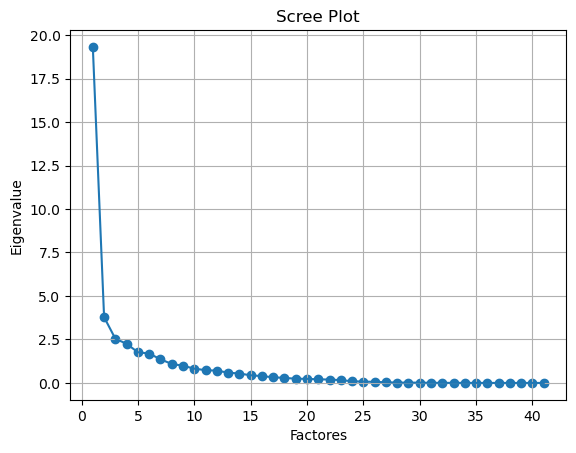

,A1,A2,A3,A4,A5,A6,A7,A8
V01_POB20,0.894689,0.381744,-0.143382,-0.028897,0.082082,0.005825,-0.008586,-0.004825
V02_POB10,0.879781,0.403934,-0.151550,-0.023935,0.038626,-0.024535,-0.008482,-0.009594
V03_TCPOB,0.041043,-0.018936,-0.117583,0.083669,0.840825,0.118242,-0.017785,-0.058588
V04_POB17,0.891402,0.389268,-0.145977,-0.027325,0.066104,-0.003953,-0.008844,-0.006651
V05_AN10,0.618815,0.751064,0.028690,-0.028293,0.024653,0.087235,-0.059378,-0.019595
V06_AN20,0.612442,0.756040,0.012416,-0.036651,-0.031642,0.086519,-0.066396,-0.031466
V07_TCAN,-0.076751,-0.006289,0.056300,-0.034141,-0.720745,-0.102374,0.051561,0.015462
V08_AN17,0.615295,0.755961,0.017119,-0.034179,-0.015925,0.086890,-0.064564,-0.028509
V09_%AN,-0.188571,0.024090,0.810961,-0.076981,-0.207531,-0.079511,0.124493,-0.026186
V10_EX20,0.479386,0.823840,0.037599,0.011088,0.154102,-0.083571,-0.000778,0.010876


,A1,A2,A3,A4,A5,A6,A7,A8
SS Loadings,15.47546,5.373773,2.426179,2.261491,1.934732,1.611883,1.395596,1.226567
Proportion Var,0.37745,0.131068,0.059175,0.055158,0.047189,0.039314,0.034039,0.029916
Cumulative Var,0.37745,0.508518,0.567693,0.622851,0.670040,0.709354,0.743393,0.773309


In [82]:
#asignar DF a tratar
MAPA_CM_df_A= MAPA_CM_df

#hacer CVEGEO index y borrar columnas

MAPA_CM_df_A = MAPA_CM_df_A.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN'])

MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=8, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8']#,'A9']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8']#,'A9']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

##### sin alta correlación

In [83]:
# Check for highly correlated variables
correlation_matrix = MAPA_CM_df_A.corr()
highly_correlated = (correlation_matrix > 0.95) & (correlation_matrix < 1.0)

print("Highly Correlated Variables:\n", highly_correlated)

# Drop one of each pair of highly correlated variables
variables_to_drop = set()
for var in highly_correlated.columns:
    variables_to_drop.update(set(highly_correlated.index[highly_correlated[var]]))
MAPA_CM_df_B = MAPA_CM_df_A.drop(columns=variables_to_drop)


Highly Correlated Variables:
             V01_POB20  V02_POB10  V03_TCPOB  V04_POB17  V05_AN10  V06_AN20  \
V01_POB20       False       True      False       True     False     False   
V02_POB10        True      False      False       True     False     False   
V03_TCPOB       False      False      False      False     False     False   
V04_POB17        True       True      False      False     False     False   
V05_AN10        False      False      False      False     False      True   
V06_AN20        False      False      False      False      True     False   
V07_TCAN        False      False      False      False     False     False   
V08_AN17        False      False      False      False      True      True   
V09_%AN         False      False      False      False     False     False   
V10_EX20        False      False      False      False     False     False   
V11_EX10        False      False      False      False     False     False   
V12_TCEX        False      False  

Chi square
nan nan

Modelo KMO
0.6149561388917039

Valores propios
[ 3.82358556e+00  2.45301005e+00  2.29351813e+00  1.99234246e+00
  1.56402768e+00  1.39399497e+00  1.00300442e+00  9.51698122e-01
  7.70589948e-01  6.76736227e-01  6.40425449e-01  4.93878662e-01
  4.38541074e-01  3.79168698e-01  3.20739405e-01  2.59779210e-01
  2.25272650e-01  1.83914835e-01  1.35772451e-01 -3.97640449e-16]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


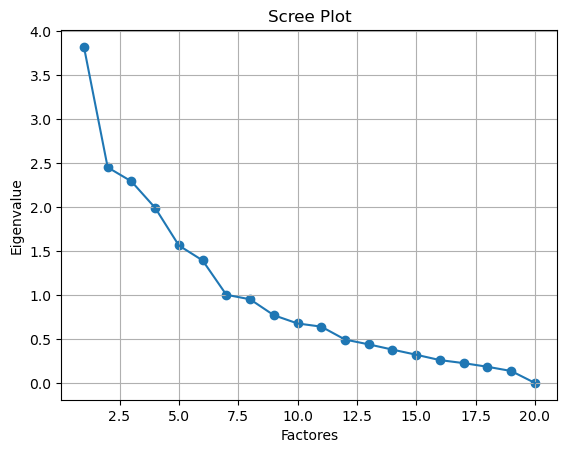

,A1,A2,A3,A4,A5,A6
V03_TCPOB,0.008257,-0.130417,0.094304,0.881636,0.012148,-0.031596
V07_TCAN,-0.042759,0.069957,-0.041127,-0.744848,0.032534,-0.013546
V09_%AN,-0.114202,0.806434,-0.094109,-0.212329,0.119950,-0.043503
V11_EX10,0.784729,0.115176,-0.006361,0.027110,-0.067826,0.019401
V12_TCEX,0.122808,0.021277,-0.069316,0.527319,-0.076036,-0.091985
V14_%EX,-0.023488,0.927549,-0.072002,0.009011,0.093683,-0.096309
V15_HA,0.793542,-0.259737,-0.049967,0.068540,-0.045551,0.016638
V18_TCPIB,-0.021215,0.114769,0.049518,0.029385,-0.039505,0.025829
V22_TCIT,-0.026022,0.080035,0.992932,0.091505,0.021486,0.009454
V23_TP-TI,0.025232,-0.121893,-0.966299,0.229936,-0.012672,-0.018215


,A1,A2,A3,A4,A5,A6
SS Loadings,2.798912,2.230044,2.223062,1.820115,1.355173,1.229655
Proportion Var,0.139946,0.111502,0.111153,0.091006,0.067759,0.061483
Cumulative Var,0.139946,0.251448,0.362601,0.453607,0.521365,0.582848


In [84]:
#asignar DF a tratar
MAPA_CM_df_A= MAPA_CM_df_B

#hacer CVEGEO index y borrar columnas

# MAPA_CM_df_A = MAPA_CM_df_A.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN'])

# MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7','A8','A9']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7','A8','A9']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

#### Filtrado

C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Chi square
inf 0.0

Modelo KMO
0.8327041608213828

Valores propios
[ 1.93782098e+01  3.74761687e+00  2.47243659e+00  2.37041192e+00
  1.74278156e+00  1.62582321e+00  1.38052191e+00  1.06441087e+00
  1.05160832e+00  8.20015597e-01  7.34405055e-01  7.07625854e-01
  6.19449614e-01  5.14653941e-01  4.66049089e-01  3.60311239e-01
  3.38394565e-01  2.87617514e-01  2.61309332e-01  2.26773686e-01
  1.95148005e-01  1.48464550e-01  1.13029314e-01  9.58471742e-02
  9.21432320e-02  7.34375879e-02  4.69441735e-02  2.22835355e-02
  1.53605991e-02  1.01561806e-02  6.29294122e-03  4.18612167e-03
  2.56056066e-03  1.89061194e-03  8.72431202e-04  5.69571196e-04
  3.73343457e-04  1.16189388e-05  1.93419030e-06  7.63035448e-17
 -6.99599097e-17]


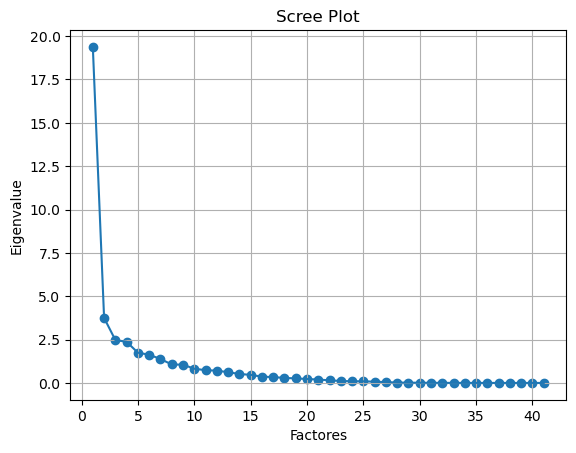

,A1,A2,A3,A4,A5,A6,A7,A8
V01_POB20,0.921347,0.316548,-0.037037,-0.104879,0.068551,0.096771,-0.018975,-0.018247
V02_POB10,0.921211,0.326584,-0.042358,-0.110155,0.069078,0.056872,-0.027486,-0.018492
V03_TCPOB,0.018883,0.001057,0.123821,-0.153644,0.087122,0.850022,0.003218,-0.003339
V04_POB17,0.922081,0.320148,-0.038900,-0.106421,0.068188,0.081444,-0.021804,-0.018391
V05_AN10,0.627865,0.743260,-0.038545,0.038194,0.070232,0.034727,-0.050819,-0.000634
V06_AN20,0.603318,0.761154,-0.050617,0.032122,0.077294,-0.013703,-0.057554,0.001437
V07_TCAN,-0.089945,0.014154,-0.049767,0.031909,-0.134994,-0.723858,0.064645,-0.010999
V08_AN17,0.611217,0.756931,-0.046970,0.033931,0.075205,0.000007,-0.055606,0.000922
V09_%AN,-0.168008,0.051327,-0.070253,0.816523,-0.129365,-0.194021,0.129997,-0.062232
V10_EX20,0.459224,0.819769,-0.023116,0.063720,-0.061990,0.150616,-0.016309,-0.076714


,A1,A2,A3,A4,A5,A6,A7,A8
SS Loadings,16.064073,5.095012,2.252434,2.169281,1.927868,1.816665,1.416848,0.907654
Proportion Var,0.391807,0.124269,0.054937,0.052909,0.047021,0.044309,0.034557,0.022138
Cumulative Var,0.391807,0.516075,0.571013,0.623922,0.670943,0.715252,0.749809,0.771947


In [86]:
#asignar DF a tratar
MAPA_CM_df_A= MAPA_CM_df_filtrado

#hacer CVEGEO index y borrar columnas

MAPA_CM_df_A = MAPA_CM_df_A.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN'])

MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=42, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=8, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

##### sin alta correlación

In [87]:
# Check for highly correlated variables
correlation_matrix = MAPA_CM_df_A.corr()
highly_correlated = (correlation_matrix > 0.95) & (correlation_matrix < 1.0)

print("Highly Correlated Variables:\n", highly_correlated)

# Drop one of each pair of highly correlated variables
variables_to_drop = set()
for var in highly_correlated.columns:
    variables_to_drop.update(set(highly_correlated.index[highly_correlated[var]]))
MAPA_CM_df_B = MAPA_CM_df_A.drop(columns=variables_to_drop)


Highly Correlated Variables:
             V01_POB20  V02_POB10  V03_TCPOB  V04_POB17  V05_AN10  V06_AN20  \
V01_POB20       False       True      False       True     False     False   
V02_POB10        True      False      False       True     False     False   
V03_TCPOB       False      False      False      False     False     False   
V04_POB17        True       True      False      False     False     False   
V05_AN10        False      False      False      False     False      True   
V06_AN20        False      False      False      False      True     False   
V07_TCAN        False      False      False      False     False     False   
V08_AN17        False      False      False      False      True      True   
V09_%AN         False      False      False      False     False     False   
V10_EX20        False      False      False      False     False     False   
V11_EX10        False      False      False      False     False     False   
V12_TCEX        False      False  

Chi square
17856.21555982129 0.0

Modelo KMO
0.6415585407913594

Valores propios
[4.32329237e+00 2.50724800e+00 2.37692939e+00 1.88533277e+00
 1.52799686e+00 1.35039086e+00 1.05097589e+00 9.66127986e-01
 8.71617010e-01 7.60413038e-01 6.87594789e-01 5.62413342e-01
 4.65464058e-01 4.54053861e-01 2.84669990e-01 2.69773084e-01
 2.36309616e-01 1.67519576e-01 1.35066310e-01 1.16811204e-01
 4.84855212e-16]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


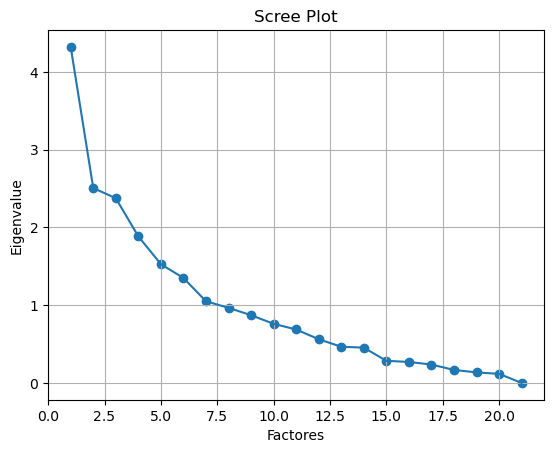

,A1,A2,A3,A4,A5,A6,A7
V03_TCPOB,0.000571,0.114203,-0.154311,0.874343,0.047811,-0.009093,-0.002105
V07_TCAN,-0.057233,-0.037960,0.075575,-0.733110,-0.021815,-0.017479,0.069279
V09_%AN,-0.116017,-0.078349,0.786008,-0.196313,0.085853,-0.036925,0.092088
V11_EX10,0.692244,-0.069119,0.199078,0.014554,-0.010587,0.063226,-0.227048
V12_TCEX,0.089562,-0.081148,0.047113,0.516299,-0.054525,-0.078154,-0.047791
V14_%EX,-0.058899,-0.061717,0.947995,0.028513,0.054855,-0.135584,0.074539
V15_HA,0.822807,-0.040959,-0.193225,0.049237,-0.010634,-0.006955,-0.099583
V16_PIB13,0.784949,-0.047112,-0.209616,0.078995,-0.036407,-0.081057,0.132492
V18_TCPIB,-0.048283,0.059356,0.130123,0.007116,0.004201,0.107737,-0.086714
V22_TCIT,-0.074391,0.989590,0.028735,0.115960,0.068908,0.028171,0.037164


,A1,A2,A3,A4,A5,A6,A7
SS Loadings,3.570804,2.185506,2.183813,1.755130,1.238344,0.894785,0.796443
Proportion Var,0.170038,0.104072,0.103991,0.083578,0.058969,0.042609,0.037926
Cumulative Var,0.170038,0.274110,0.378101,0.461679,0.520647,0.563256,0.601182


In [88]:
#asignar DF a tratar
MAPA_CM_df_A= MAPA_CM_df_B

#hacer CVEGEO index y borrar columnas

# MAPA_CM_df_A = MAPA_CM_df_A.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN'])

# MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']#,'A8']#,'A9']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']#,'A8']#,'A9']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

### Zonas metropolitanas, Zonas conurbadas, y Metrópolis Municipales

Chi square
32868.69749202466 0.0

Modelo KMO
0.8122359454485755

Valores propios
[ 2.00483088e+01  4.13190758e+00  2.56536740e+00  2.27238906e+00
  2.01029242e+00  1.68307454e+00  1.26707838e+00  1.19159940e+00
  1.00626783e+00  8.33472634e-01  7.81643812e-01  6.27854710e-01
  5.32967031e-01  4.86092591e-01  4.38257623e-01  3.68003662e-01
  2.99729567e-01  2.54949208e-01  2.14199601e-01  1.84098261e-01
  1.77997898e-01  1.45709931e-01  1.32599362e-01  9.71562783e-02
  6.99839699e-02  5.05469154e-02  4.27818584e-02  2.91259215e-02
  1.84281151e-02  1.29756009e-02  1.17054902e-02  5.08305959e-03
  3.13789319e-03  2.04186266e-03  1.87871423e-03  7.42586090e-04
  3.45447050e-04  2.00295584e-04  3.90815125e-06  7.40501284e-07
  2.79989537e-16 -7.18051764e-18]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


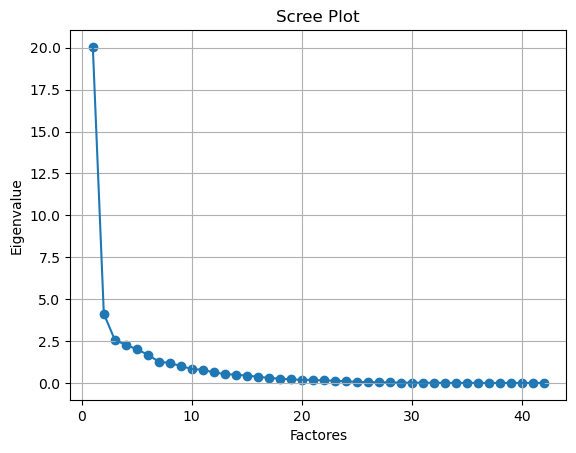

,A1,A2,A3,A4,A5,A6,A7,A8
V01_POB20,0.968220,0.163291,-0.051433,0.089669,0.021895,0.002612,-0.041372,-0.014480
V02_POB10,0.966396,0.157956,-0.044258,0.046629,-0.030620,-0.018965,-0.038049,-0.032647
V03_TCPOB,-0.112242,0.052107,0.021847,0.087265,0.852143,0.081167,0.006669,0.067861
V04_POB17,0.969138,0.161617,-0.049298,0.076476,0.001912,-0.004593,-0.040241,-0.020241
V05_AN10,0.944788,0.020660,-0.024949,-0.109086,-0.043807,-0.037396,-0.097119,0.240903
V06_AN20,0.936786,0.010363,-0.020744,-0.131982,-0.091008,-0.041794,-0.093885,0.242343
V07_TCAN,0.043656,-0.184913,-0.021974,-0.079892,-0.819070,-0.005767,0.013741,-0.040974
V08_AN17,0.940042,0.013141,-0.021760,-0.125598,-0.078528,-0.041085,-0.094929,0.242376
V09_%AN,-0.136155,-0.804326,-0.012752,-0.022989,-0.257288,0.105229,0.018449,0.212632
V10_EX20,0.884079,-0.043666,0.036021,-0.383689,0.079176,-0.024779,-0.064588,0.067735


,A1,A2,A3,A4,A5,A6,A7,A8
SS Loadings,18.667468,3.531341,2.354776,2.202066,2.063621,1.988611,1.488333,1.016378
Proportion Var,0.444464,0.084080,0.056066,0.052430,0.049134,0.047348,0.035437,0.024199
Cumulative Var,0.444464,0.528543,0.584609,0.637039,0.686173,0.733521,0.768958,0.793157


In [89]:
#asignar DF a tratar
MAPA_CM_df_A= MAPA_CM_df_Metro

#hacer CVEGEO index y borrar columnas

MAPA_CM_df_A = MAPA_CM_df_A.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN', 'TIPO','CVE_METRO','POSICIÓN'])

MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=42, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=8, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

#### Zonas metropolitanas

In [90]:
#Filtrar por cada tipo de ZM
ZM = ['ZM']

def filtrar_metropolis(dataframe, ZM):
    return dataframe[(dataframe['TIPO'].isin(ZM))]

MAPA_CM_df_Metro_ZM = filtrar_metropolis(MAPA_CM_df_Metro, ZM)

Chi square
26546.38130883686 0.0

Modelo KMO
0.8055951586500553

Valores propios
[2.02359075e+01 4.17344778e+00 2.62474724e+00 2.07722834e+00
 1.89709675e+00 1.52789067e+00 1.34321210e+00 1.21081467e+00
 1.00860866e+00 8.76799051e-01 8.01673413e-01 6.23883796e-01
 5.90817168e-01 4.91385021e-01 4.73628794e-01 3.70462924e-01
 3.29685373e-01 2.34663137e-01 2.13110485e-01 1.82254284e-01
 1.63947111e-01 1.42895074e-01 1.31063975e-01 7.50133090e-02
 6.31446133e-02 4.14516371e-02 3.44204684e-02 2.10396802e-02
 1.50996672e-02 9.79126749e-03 5.32457754e-03 3.40752364e-03
 2.31289009e-03 1.83731031e-03 1.03840315e-03 4.65625123e-04
 2.84798676e-04 1.42110521e-04 2.59111002e-06 2.53587550e-07
 8.88147857e-16 3.99917373e-16]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


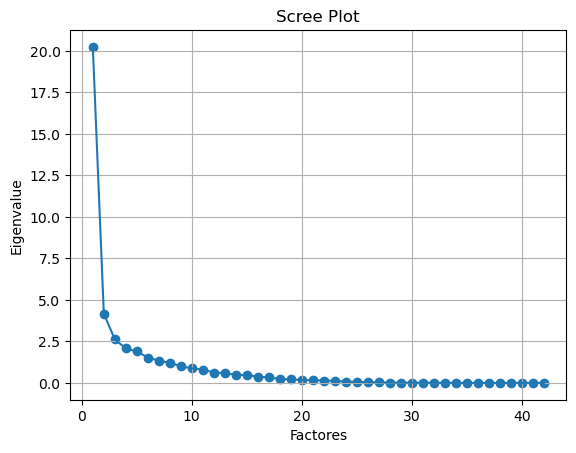

,A1,A2,A3,A4,A5,A6,A7,A8
V01_POB20,0.974606,0.086710,-0.130836,-0.051627,0.009053,0.042541,-0.050323,-0.023190
V02_POB10,0.971209,0.051212,-0.144557,-0.045300,-0.035166,0.012604,-0.039851,-0.024875
V03_TCPOB,-0.127592,0.138240,-0.006200,0.058721,0.870078,0.080470,-0.001553,0.014116
V04_POB17,0.974937,0.075679,-0.135180,-0.050014,-0.008204,0.033293,-0.046945,-0.023611
V05_AN10,0.942446,0.083236,0.033957,-0.038233,-0.025671,-0.204269,-0.112561,-0.138401
V06_AN20,0.940054,0.068012,0.034119,-0.032292,-0.060787,-0.215577,-0.104172,-0.139665
V07_TCAN,0.075226,-0.148329,0.152090,-0.055695,-0.836963,-0.059271,0.007995,0.021036
V08_AN17,0.941321,0.072395,0.034211,-0.034124,-0.051708,-0.212578,-0.106670,-0.139461
V09_%AN,-0.136973,-0.174056,0.880106,-0.029510,-0.265809,-0.061233,0.023843,-0.022834
V10_EX20,0.872073,-0.114870,0.010674,0.040690,0.079121,-0.414495,-0.061046,-0.003760


,A1,A2,A3,A4,A5,A6,A7,A8
SS Loadings,19.048665,2.949351,2.379531,2.378373,1.971423,1.727809,1.501466,1.250696
Proportion Var,0.453540,0.070223,0.056655,0.056628,0.046939,0.041138,0.035749,0.029778
Cumulative Var,0.453540,0.523762,0.580418,0.637046,0.683984,0.725123,0.760872,0.790650


In [91]:
#asignar DF a tratar
MAPA_CM_df_A= MAPA_CM_df_Metro_ZM

#hacer CVEGEO index y borrar columnas

MAPA_CM_df_A = MAPA_CM_df_A.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN', 'TIPO','CVE_METRO','POSICIÓN'])

MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=42, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=8, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7','A8']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

#### Zonas conurbadas

In [92]:
#Filtrar por cada tipo de ZM
ZM = ['ZC']

def filtrar_metropolis(dataframe, ZM):
    return dataframe[(dataframe['TIPO'].isin(ZM))]

MAPA_CM_df_Metro_ZC = filtrar_metropolis(MAPA_CM_df_Metro, ZM)

Chi square
nan nan

Modelo KMO
nan

Valores propios
[ 1.88676649e+01  6.03816359e+00  3.72945520e+00  3.47938195e+00
  2.51477163e+00  1.70836913e+00  1.17433999e+00  8.81763724e-01
  8.34123551e-01  7.32918313e-01  4.39855674e-01  4.03380453e-01
  3.63333742e-01  2.80693540e-01  2.19823869e-01  1.22363472e-01
  8.29393504e-02  5.16774909e-02  2.81142754e-02  2.04424568e-02
  1.07831856e-02  1.01739910e-02  3.39785278e-03  2.06867820e-03
  2.29136764e-15  1.30408691e-15  1.18720321e-15  8.42918540e-16
  7.26733499e-16  5.07977819e-16  3.89427892e-16  2.99020038e-16
  1.86292185e-16  2.60692206e-17 -1.56677976e-16 -3.65699778e-16
 -4.80417290e-16 -5.44240151e-16 -8.05856576e-16 -1.24682712e-15
 -1.45465075e-15 -2.12444051e-15]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


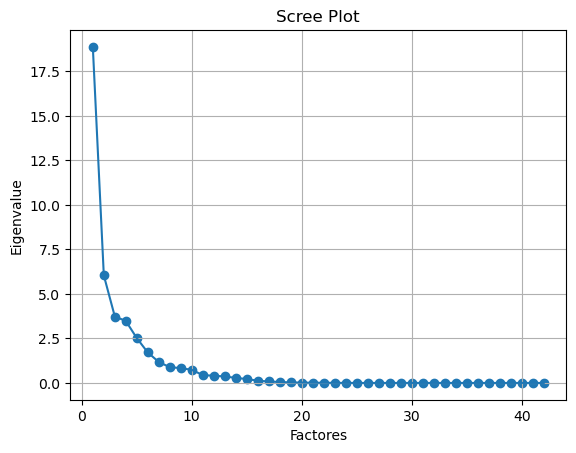

,A1,A2,A3,A4,A5,A6,A7
V01_POB20,0.854812,0.334938,0.303081,0.004610,0.051210,-0.114683,0.190625
V02_POB10,0.845575,0.299124,0.343045,0.035563,0.007950,-0.113189,0.213150
V03_TCPOB,0.034052,0.415857,-0.445324,-0.248918,0.506554,-0.010776,-0.135613
V04_POB17,0.852902,0.324761,0.314935,0.013825,0.038620,-0.114383,0.197439
V05_AN10,0.641383,0.639948,0.277819,0.045565,-0.093150,0.176308,0.038333
V06_AN20,0.641026,0.631137,0.259824,0.110630,-0.113986,0.179398,0.037025
V07_TCAN,-0.006482,-0.138254,-0.156511,0.407539,-0.250354,-0.106553,-0.461298
V08_AN17,0.641936,0.634292,0.265463,0.090651,-0.108077,0.178782,0.037318
V09_%AN,-0.070057,0.393456,0.048810,0.097056,0.005415,0.900427,-0.057542
V10_EX20,0.290274,0.905678,0.042583,0.045744,-0.039230,0.107945,0.139025


,A1,A2,A3,A4,A5,A6,A7
SS Loadings,14.27158,6.262945,4.226308,3.505624,3.038366,2.563457,2.555888
Proportion Var,0.33980,0.149118,0.100626,0.083467,0.072342,0.061035,0.060854
Cumulative Var,0.33980,0.488917,0.589544,0.673011,0.745353,0.806388,0.867242


In [93]:
#asignar DF a tratar
MAPA_CM_df_A= MAPA_CM_df_Metro_ZC

#hacer CVEGEO index y borrar columnas

MAPA_CM_df_A = MAPA_CM_df_A.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN', 'TIPO','CVE_METRO','POSICIÓN'])

MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=42, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']#,'A8']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']#,'A8']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

##### sin alta correlación

In [94]:
# Check for highly correlated variables
correlation_matrix = MAPA_CM_df_A.corr()
highly_correlated = (correlation_matrix > 0.95) & (correlation_matrix < 1.0)

print("Highly Correlated Variables:\n", highly_correlated)

# Drop one of each pair of highly correlated variables
variables_to_drop = set()
for var in highly_correlated.columns:
    variables_to_drop.update(set(highly_correlated.index[highly_correlated[var]]))
MAPA_CM_df_B = MAPA_CM_df_A.drop(columns=variables_to_drop)


Highly Correlated Variables:
               V01_POB20  V02_POB10  V03_TCPOB  V04_POB17  V05_AN10  V06_AN20  \
V01_POB20         False       True      False       True     False     False   
V02_POB10          True      False      False       True     False     False   
V03_TCPOB         False      False      False      False     False     False   
V04_POB17          True       True      False      False     False     False   
V05_AN10          False      False      False      False     False      True   
V06_AN20          False      False      False      False      True     False   
V07_TCAN          False      False      False      False     False     False   
V08_AN17          False      False      False      False      True      True   
V09_%AN           False      False      False      False     False     False   
V10_EX20          False      False      False      False     False     False   
V11_EX10          False      False      False      False     False     False   
V12_TCEX  

Chi square
nan nan

Modelo KMO
nan

Valores propios
[ 7.64535250e+00  4.66426146e+00  3.26259896e+00  3.01937892e+00
  1.78834221e+00  1.36155269e+00  1.13702781e+00  8.53363672e-01
  6.03870052e-01  4.00541905e-01  3.58761432e-01  2.97072473e-01
  2.51457891e-01  1.31823582e-01  6.43485627e-02  6.20617669e-02
  4.69661237e-02  2.43533511e-02  1.46269259e-02  4.63567571e-03
  4.31098742e-03  1.74099420e-03  9.82971393e-04  5.67081440e-04
 -6.63001203e-17 -1.14786325e-16]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


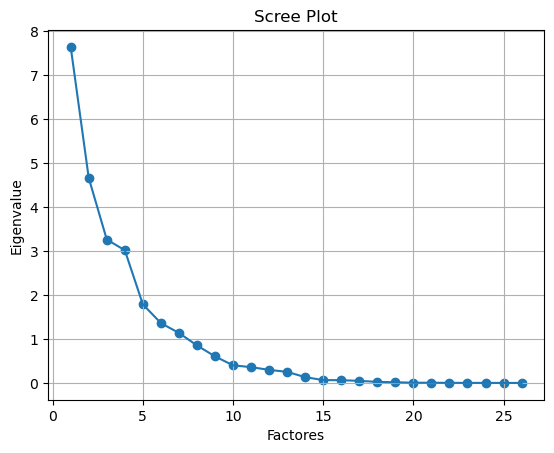

,A1,A2,A3,A4,A5,A6,A7,A8
V03_TCPOB,0.155185,-0.283171,-0.177511,0.137201,0.369840,-0.065108,0.687645,0.066594
V07_TCAN,0.057669,-0.178928,0.353018,-0.194562,-0.179057,0.239145,-0.070181,0.694384
V09_%AN,0.118718,0.020218,0.122288,0.862650,-0.029888,0.060733,0.070999,-0.053454
V11_EX10,0.917900,0.106680,0.184762,0.191627,-0.025811,-0.108845,0.032569,-0.094346
V12_TCEX,-0.152509,-0.202247,-0.183505,0.165661,-0.105596,-0.001625,0.739440,-0.384141
V14_%EX,0.015349,-0.358366,0.057385,0.873879,0.140334,0.090797,0.247600,-0.117282
V15_HA,0.603723,0.276539,0.265341,-0.212990,0.144152,-0.426781,-0.126312,-0.160016
V18_TCPIB,0.147050,0.105601,0.261259,0.221708,0.187202,-0.464918,0.374883,-0.048326
V22_TCIT,-0.161946,-0.051353,-0.238645,-0.102806,-0.933828,0.055063,0.082226,0.110504
V23_TP-TI,0.179902,0.002620,0.196562,0.114375,0.948973,-0.062909,0.044870,-0.087166


,A1,A2,A3,A4,A5,A6,A7,A8
SS Loadings,4.252141,3.615241,3.249245,3.117734,3.025235,1.98379,1.934451,1.428984
Proportion Var,0.163544,0.139048,0.124971,0.119913,0.116355,0.07630,0.074402,0.054961
Cumulative Var,0.163544,0.302592,0.427563,0.547475,0.663831,0.74013,0.814532,0.869493


In [76]:
#asignar DF a tratar
MAPA_CM_df_A= MAPA_CM_df_B

#hacer CVEGEO index y borrar columnas

# MAPA_CM_df_A = MAPA_CM_df_A.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN', 'TIPO','CVE_METRO','POSICIÓN'])

# MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=42, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']#,'A8']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']#,'A8']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

#### Metrópolis municipales

In [95]:
#Filtrar por cada tipo de ZM
ZM = ['MM']

def filtrar_metropolis(dataframe, ZM):
    return dataframe[(dataframe['TIPO'].isin(ZM))]

MAPA_CM_df_Metro_MM = filtrar_metropolis(MAPA_CM_df_Metro, ZM)

Chi square
-inf 1.0

Modelo KMO
nan

Valores propios
[ 1.47678942e+01  1.21753493e+01  6.59218454e+00  3.88948235e+00
  1.95502633e+00  1.19271807e+00  4.27345266e-01  3.27952464e-15
  3.01615963e-15  2.35544144e-15  2.00317147e-15  1.73489433e-15
  1.73406263e-15  1.56686777e-15  1.26230612e-15  1.05750024e-15
  9.24557642e-16  7.50950358e-16  5.28923448e-16  3.47291699e-16
  2.11746609e-16  1.55380437e-16  7.87618822e-17 -1.16795819e-16
 -1.28319498e-16 -3.98741961e-16 -5.03983533e-16 -5.36399265e-16
 -7.99917211e-16 -9.32896272e-16 -1.17588242e-15 -1.31553277e-15
 -1.46231807e-15 -1.74688234e-15 -1.88516491e-15 -2.18119058e-15
 -2.22129032e-15 -2.66195432e-15 -3.05970494e-15 -3.10744302e-15
 -6.55131275e-15]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


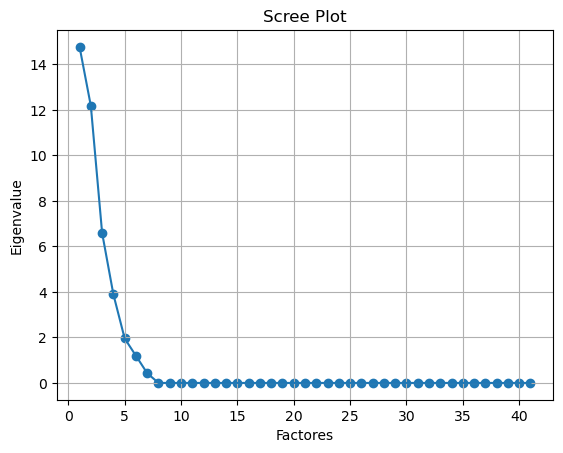

,A1,A2,A3,A4,A5,A6
V01_POB20,0.935196,-0.037795,0.239990,-0.018102,-0.251298,-0.013088
V02_POB10,0.876053,-0.279480,0.307925,-0.013572,-0.216155,0.048756
V03_TCPOB,0.019090,0.922089,-0.297479,0.059968,-0.145341,-0.157844
V04_POB17,0.922082,-0.125961,0.265144,-0.016103,-0.242829,0.005240
V05_AN10,0.312940,-0.067543,0.881471,0.231389,-0.235471,0.097154
V06_AN20,0.150286,-0.184338,0.922727,0.092745,-0.169194,0.230173
V07_TCAN,-0.211864,-0.682132,0.477438,-0.354033,0.161204,0.306662
V08_AN17,0.197757,-0.158714,0.917210,0.133862,-0.193969,0.191813
V09_%AN,-0.398394,-0.146998,0.845454,-0.043148,0.291819,0.119880
V10_EX20,0.416516,-0.028345,0.869058,-0.116654,0.170880,-0.158537


,A1,A2,A3,A4,A5,A6
SS Loadings,14.184718,10.494907,8.361368,3.632533,2.463826,1.313672
Proportion Var,0.345969,0.255973,0.203936,0.088598,0.060093,0.032041
Cumulative Var,0.345969,0.601942,0.805878,0.894476,0.954570,0.986610


In [96]:
#asignar DF a tratar
MAPA_CM_df_A= MAPA_CM_df_Metro_MM

#hacer CVEGEO index y borrar columnas

MAPA_CM_df_A = MAPA_CM_df_A.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN', 'TIPO','CVE_METRO','POSICIÓN', 'POSICIÓN_NUM'])

MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test
chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print('Chi square')
print(chi_square_value, p_value)
print()

#KMO test
kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7','A8']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7','A8']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

##### sin alta correlación

In [97]:
# Calculate correlation matrix
correlation_matrix = MAPA_CM_df_A.corr()

# Check for highly correlated variables
highly_correlated = (correlation_matrix > 0.95) & (correlation_matrix < 1.0)
print("Highly Correlated Variables:\n", highly_correlated)

# Drop one of each pair of highly correlated variables
variables_to_drop = set()
for var in highly_correlated.columns:
    variables_to_drop.update(set(highly_correlated.index[highly_correlated[var]]))
MAPA_CM_df_B = MAPA_CM_df_A.drop(columns=variables_to_drop)


Highly Correlated Variables:
             V01_POB20  V02_POB10  V03_TCPOB  V04_POB17  V05_AN10  V06_AN20  \
V01_POB20       False       True      False       True     False     False   
V02_POB10        True      False      False       True     False     False   
V03_TCPOB       False      False      False      False     False     False   
V04_POB17        True       True      False      False     False     False   
V05_AN10        False      False      False      False     False      True   
V06_AN20        False      False      False      False      True     False   
V07_TCAN        False      False      False      False     False     False   
V08_AN17        False      False      False      False      True      True   
V09_%AN         False      False      False      False     False     False   
V10_EX20        False      False      False      False     False     False   
V11_EX10        False      False      False      False     False     False   
V12_TCEX        False      False  

Chi square
nan nan

Modelo KMO
nan

Valores propios
[ 6.87236975e+00  4.99254506e+00  3.51870124e+00  2.74357125e+00
  1.64496576e+00  8.87657138e-01  3.40189803e-01  8.32134800e-16
  5.85016839e-16  3.31279286e-16  2.55664387e-16  1.61219688e-16
  1.09655404e-16  4.84739388e-17 -1.07519781e-17 -9.51018465e-17
 -1.84877745e-16 -3.17972120e-16 -3.86181396e-16 -4.86077394e-16
 -6.37814874e-16]


C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


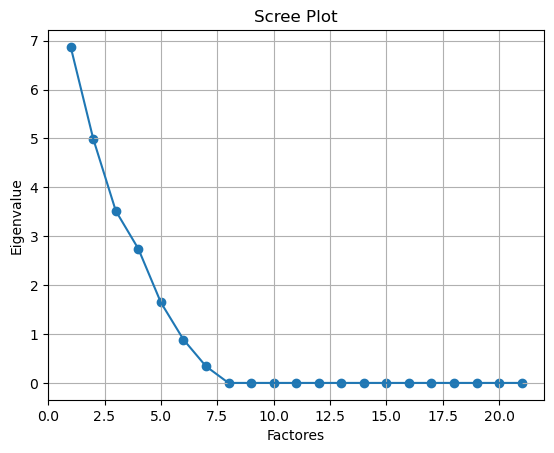

,A1,A2,A3,A4,A5,A6
V07_TCAN,0.631715,-0.291958,-0.066517,-0.154077,-0.662755,-0.093949
V09_%AN,0.936724,-0.297460,0.047760,0.110243,-0.020162,0.016253
V11_EX10,0.790696,0.081012,0.253885,-0.123658,0.073635,-0.531120
V12_TCEX,-0.371353,0.345688,0.023712,0.518355,0.251787,0.601502
V14_%EX,0.936660,-0.132583,-0.210439,0.002045,0.072194,0.244060
V15_HA,-0.072105,0.743841,0.510461,-0.087573,-0.384547,-0.115068
V18_TCPIB,0.118248,-0.265956,0.072601,0.446180,0.831389,-0.159399
V22_TCIT,-0.310648,-0.218752,0.329072,-0.817286,0.178377,0.209622
V23_TP-TI,-0.084434,0.308718,-0.337486,0.806585,0.318894,-0.085446
V24_IP11,-0.248600,0.912212,0.015853,0.272674,0.047582,-0.175149


,A1,A2,A3,A4,A5,A6
SS Loadings,4.200233,3.908872,3.743084,3.639817,2.913451,2.085342
Proportion Var,0.200011,0.186137,0.178242,0.173325,0.138736,0.099302
Cumulative Var,0.200011,0.386148,0.564390,0.737715,0.876450,0.975752


In [98]:
#asignar DF a tratar
MAPA_CM_df_A= MAPA_CM_df_B

#hacer CVEGEO index y borrar columnas

# MAPA_CM_df_A = MAPA_CM_df_A.drop(columns=['CVE_ENT', 'CVE_MUN', 'NOM_MUN', 'TIPO','CVE_METRO','POSICIÓN', 'POSICIÓN_NUM'])

# MAPA_CM_df_A = MAPA_CM_df_A.set_index('CVEGEO', drop=True)

#borrar nulos
MAPA_CM_df_A.dropna(inplace=True)

#quitar valores infinitos
MAPA_CM_df_A = MAPA_CM_df_A.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_CM_df_A = pd.DataFrame(scaler.fit_transform(MAPA_CM_df_A), columns=MAPA_CM_df_A.columns, index=MAPA_CM_df_A.index)

#barlett test
chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_CM_df_A)
print('Chi square')
print(chi_square_value, p_value)
print()

#KMO test
kmo_all,kmo_model=calculate_kmo(MAPA_CM_df_A)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.plot(range(1,MAPA_CM_df_A.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_CM_df_A)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7','A8']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_CM_df_A.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']#,'A8']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

# APRENDIZAJES  --  PARA HACER

- DELIMITAR LA MUESTRA - Borrar infinitos, borrar el 2.5% de abajo, y el 2.5% de arriba, para estabilizar los valores
- Reproducir las fórmulas, ver si hay cambios